In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import plotly.figure_factory as ff


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.metrics import silhouette_score

# Loading Dataset

In [88]:
df = pd.read_excel("/kaggle/input/eastwestairlines/EastWestAirlines.xlsx",sheet_name="data" )
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data Information

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [90]:
df=df.drop(['ID#'],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


### Data Discreption

In [91]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


* Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
* Normalization function - here custom defined

In [92]:
df.rename(columns = {'Award?':'Award'}, inplace = True)

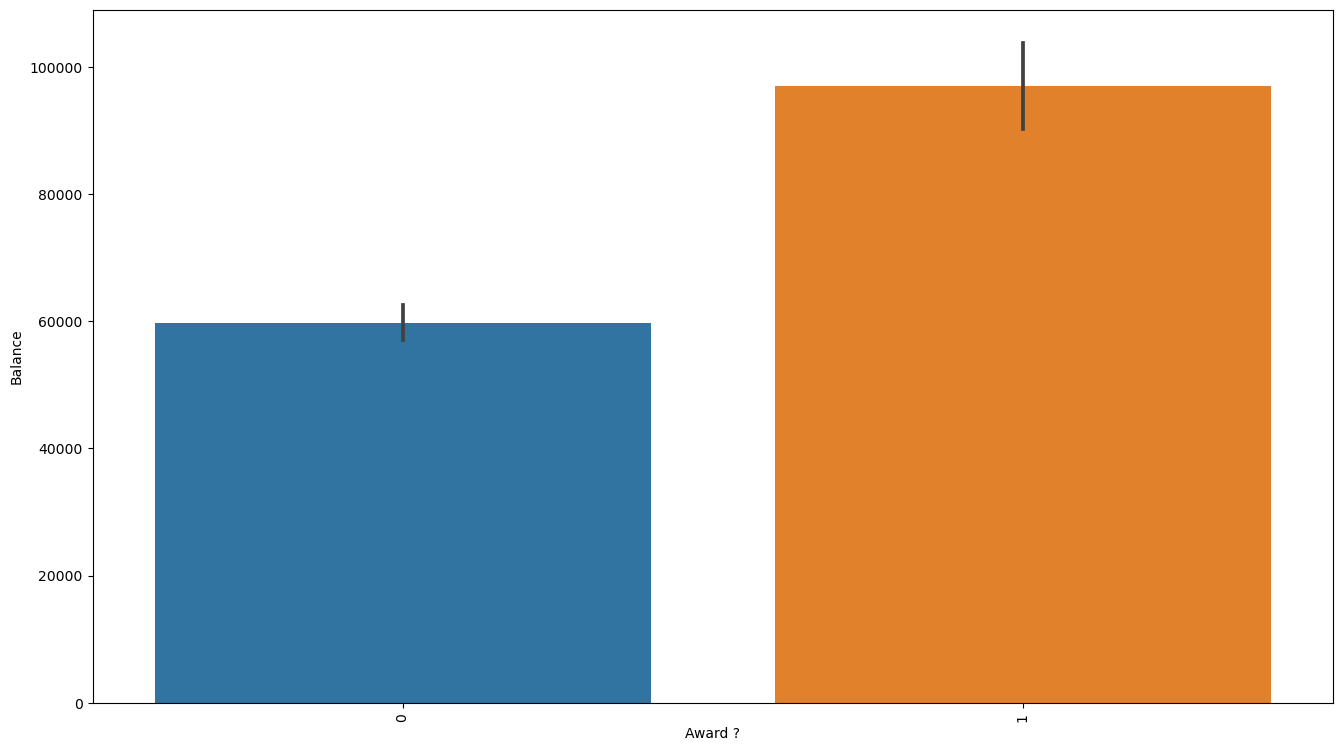

In [93]:
plt.figure(figsize = (16,9))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award ?', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

#### **what is correlated with Balance?**

In [94]:
corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

#### **Correlation heatmap**

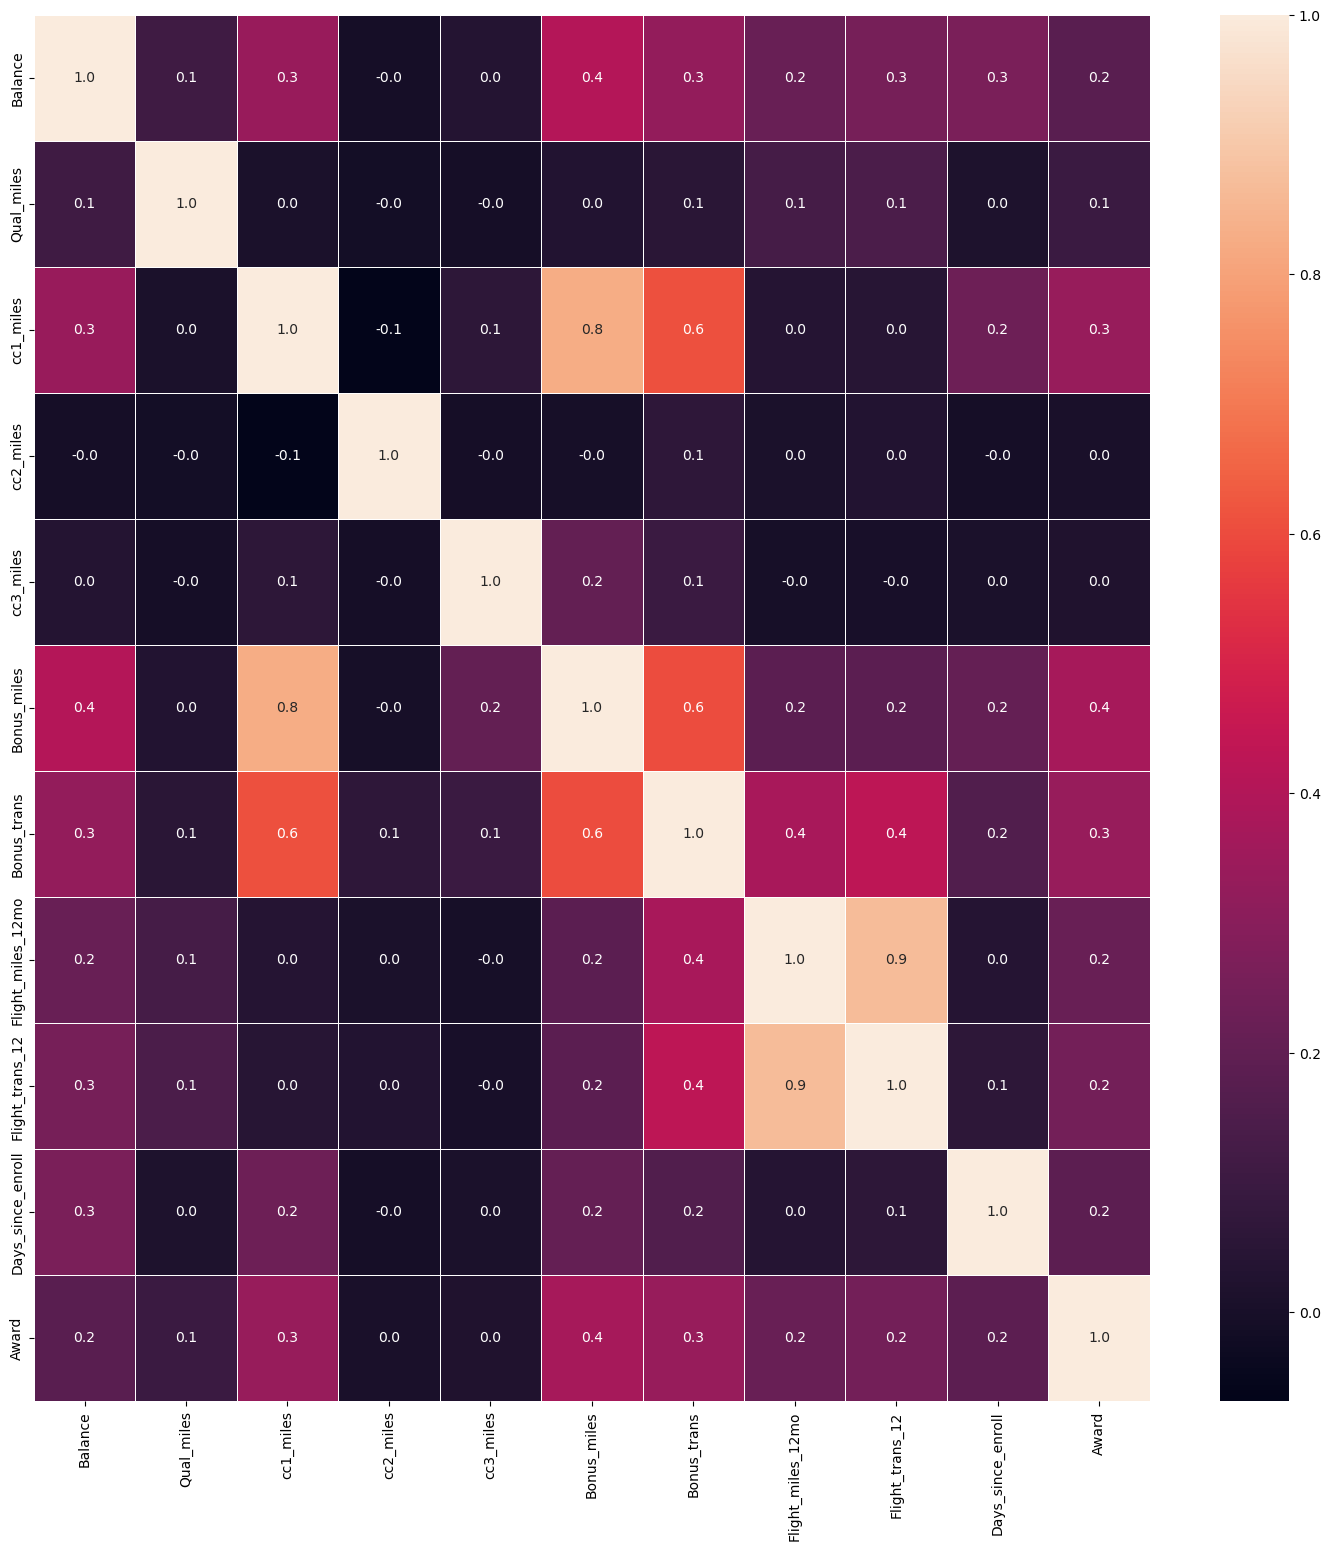

In [95]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

#### Unique points in this correlation matrix:

* ID# is negatively correlated with days_since_enroll
* flight_trans_12 is positively correlated with flight_miles_12mo
* bonus_trans is positively correlated with cc1_miles
* bonus_trans is positively correlated with bonus_miles
* bonus_miles is positively correlated with cc1_miles

#### In other words, the following are positively correlated

* Unique ID <-> Number of days since Enroll_date
* Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
* Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
* Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
* Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card


#### **Plotting frequent flying bonuses vs. non-flight bonus transactions**

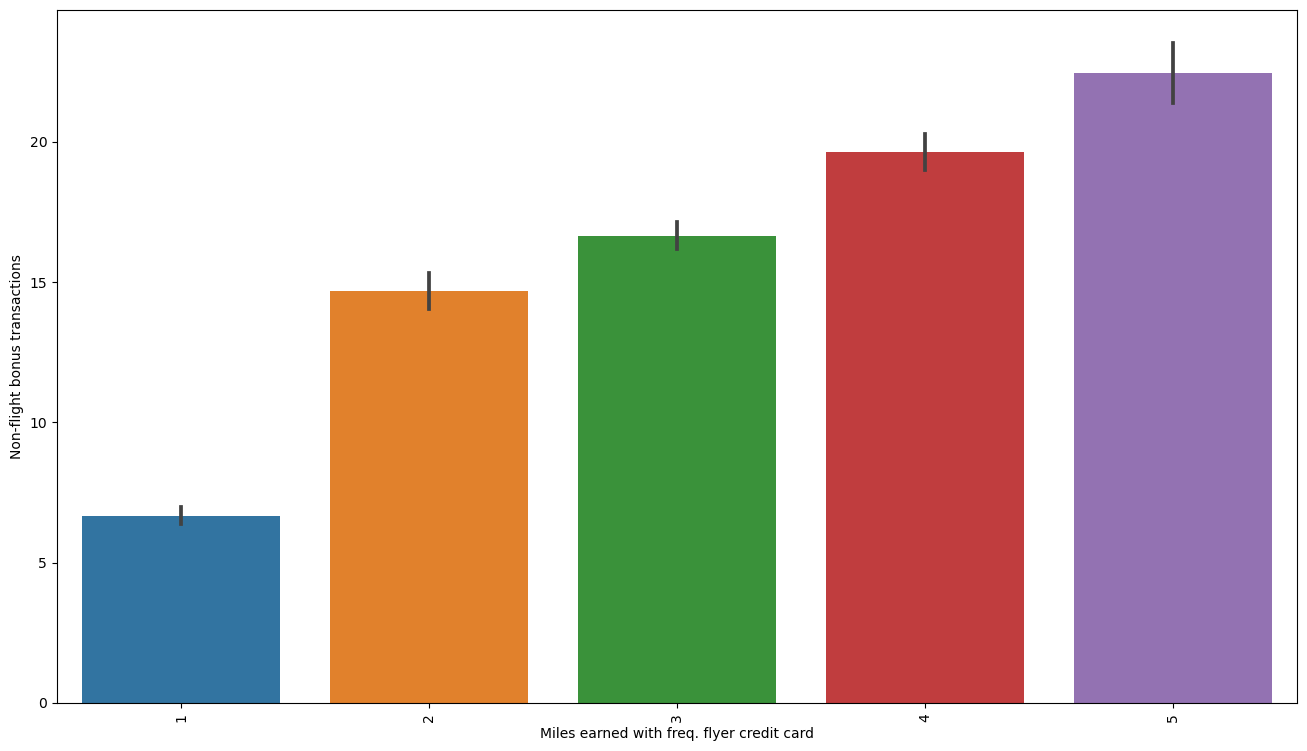

In [96]:
plt.figure(figsize = (16,9))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

#### **Box Plot for every feature, singled out**

Balance


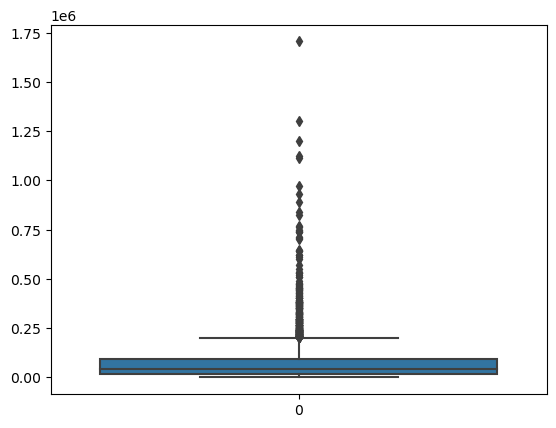

Qual_miles


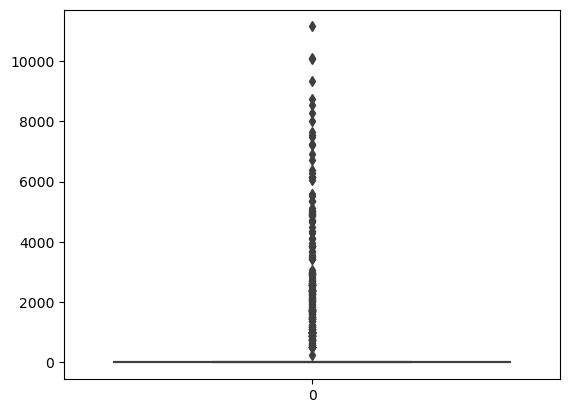

cc1_miles


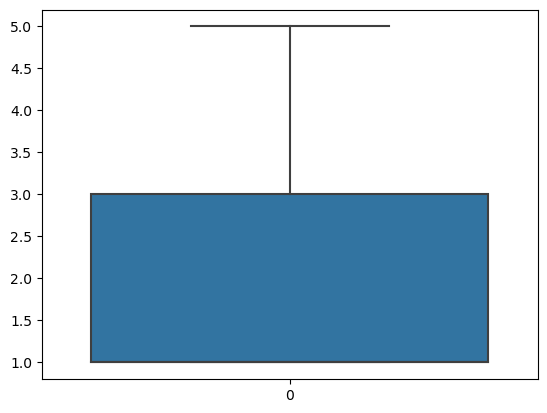

cc2_miles


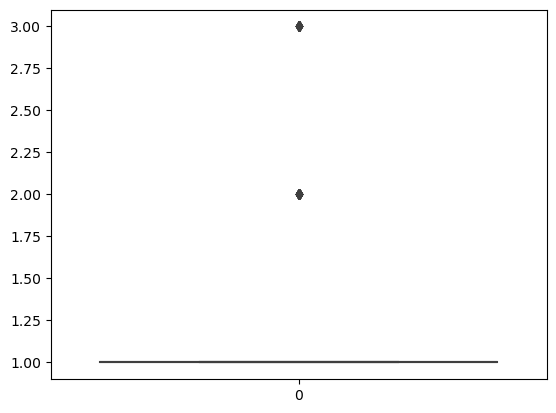

cc3_miles


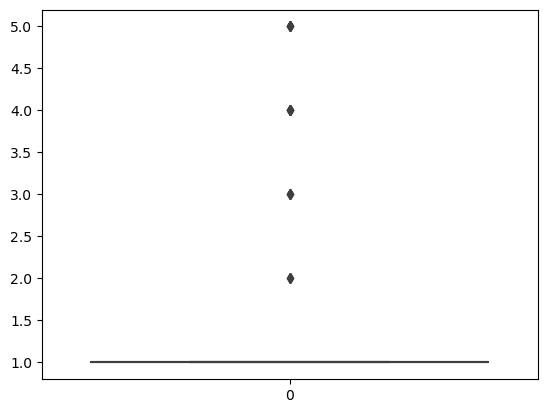

Bonus_miles


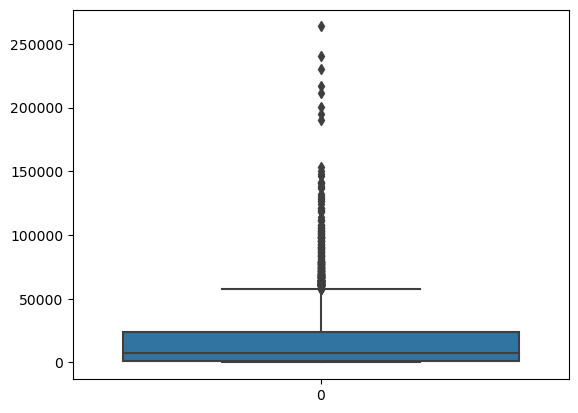

Bonus_trans


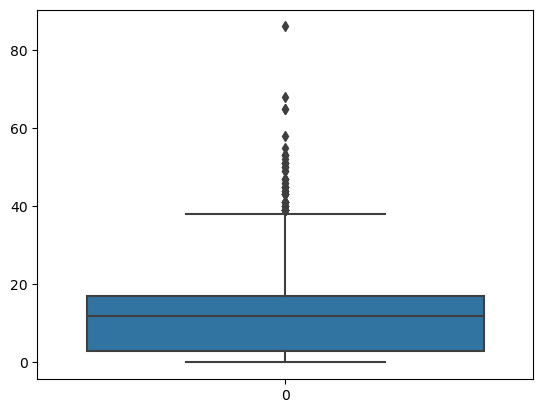

Flight_miles_12mo


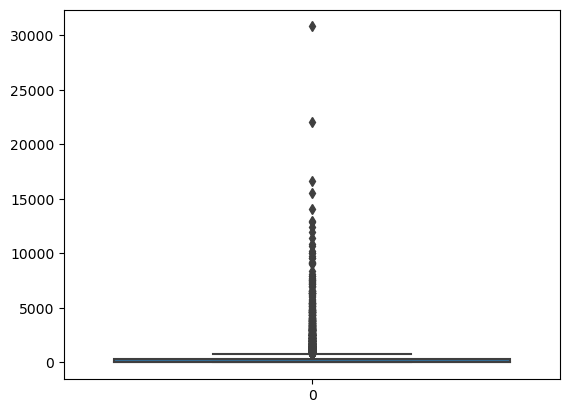

Flight_trans_12


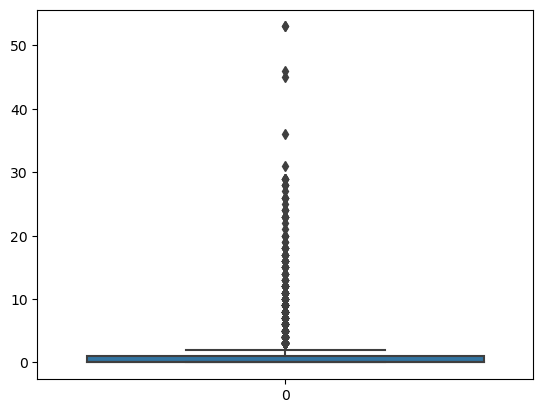

Days_since_enroll


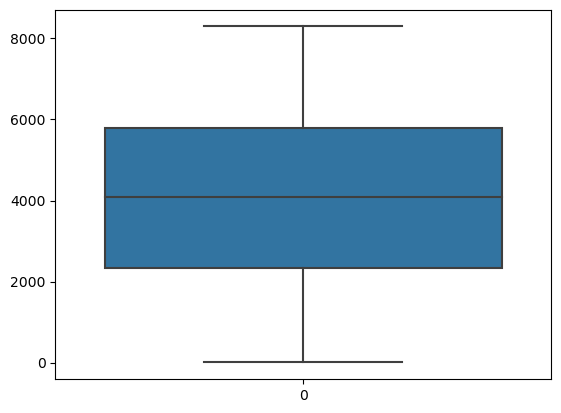

Award


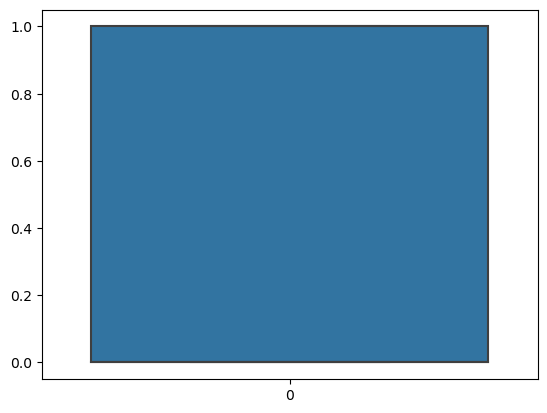

In [97]:
for n in df.columns:
    print(n)
    sns.boxplot(df[n])
    plt.show()

#### **Outlier Analysis**

#### Box plot for every feature in the same graph

<AxesSubplot:>

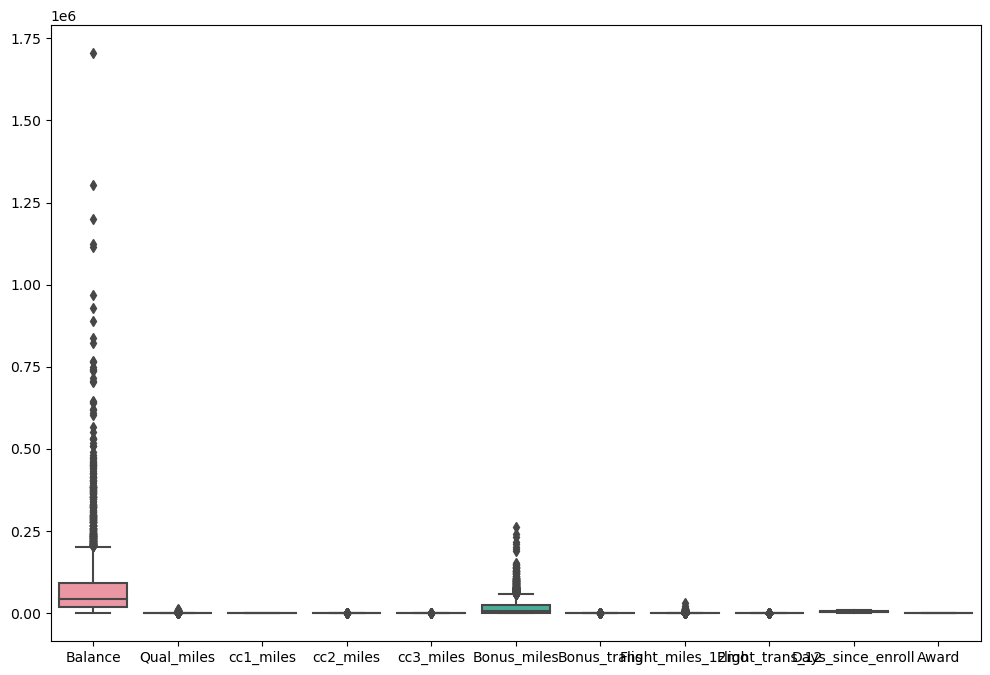

In [98]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

#### **we use sqrt() to see more clearly despite the outliers**

<AxesSubplot:>

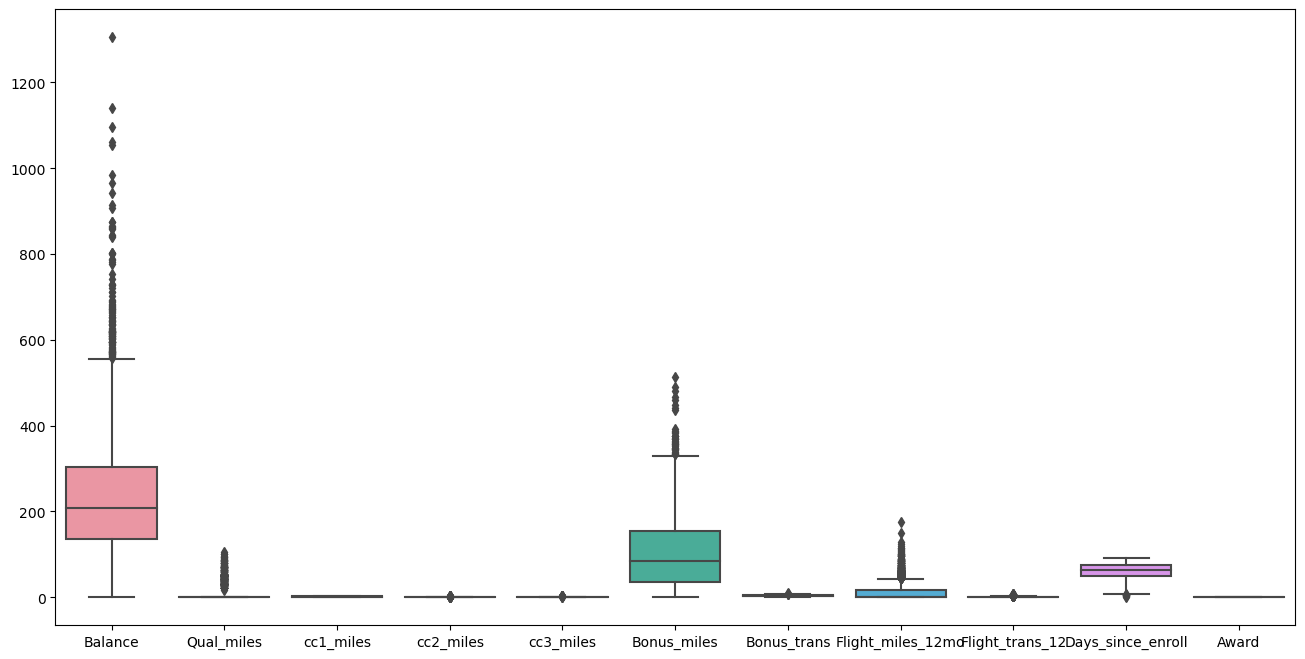

In [99]:
plt.figure(figsize=(16,8))
sns.boxplot(data=np.sqrt(df))

### **Removing the outliers from "Balance"**

In [100]:
q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1 = df[(df['Balance']>ll)&(df['Balance']<ul)]

df1.head(100)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
105,3734,0,5,1,1,61096,18,150,2,6760,1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1
107,43498,0,1,1,1,0,0,0,0,6759,1
108,84674,0,4,1,1,46335,14,50,1,6738,1


<AxesSubplot:>

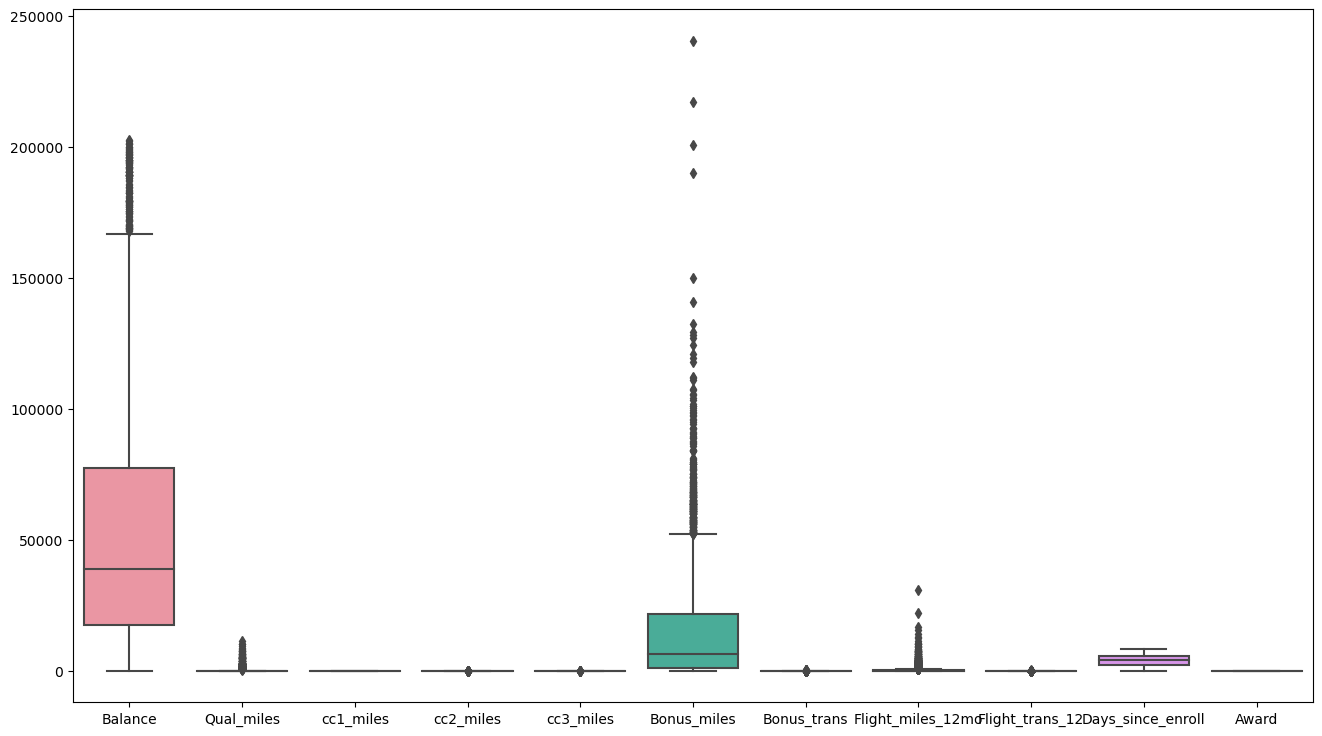

In [101]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df1)

In [102]:
df_shape = df.shape

df1_shape = df1.shape

print("shape of original dataframe:", df_shape, "\n")
print("shape of new dataframe:", df1_shape)

shape of original dataframe: (3999, 11) 

shape of new dataframe: (3733, 11)


### **Removing the outliers from "Bonus_miles"**

In [103]:
q1 = df['Bonus_miles'].quantile(0.25)
q3 = df['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Bonus_miles']>ll)&(df1['Bonus_miles']<ul)]

<AxesSubplot:>

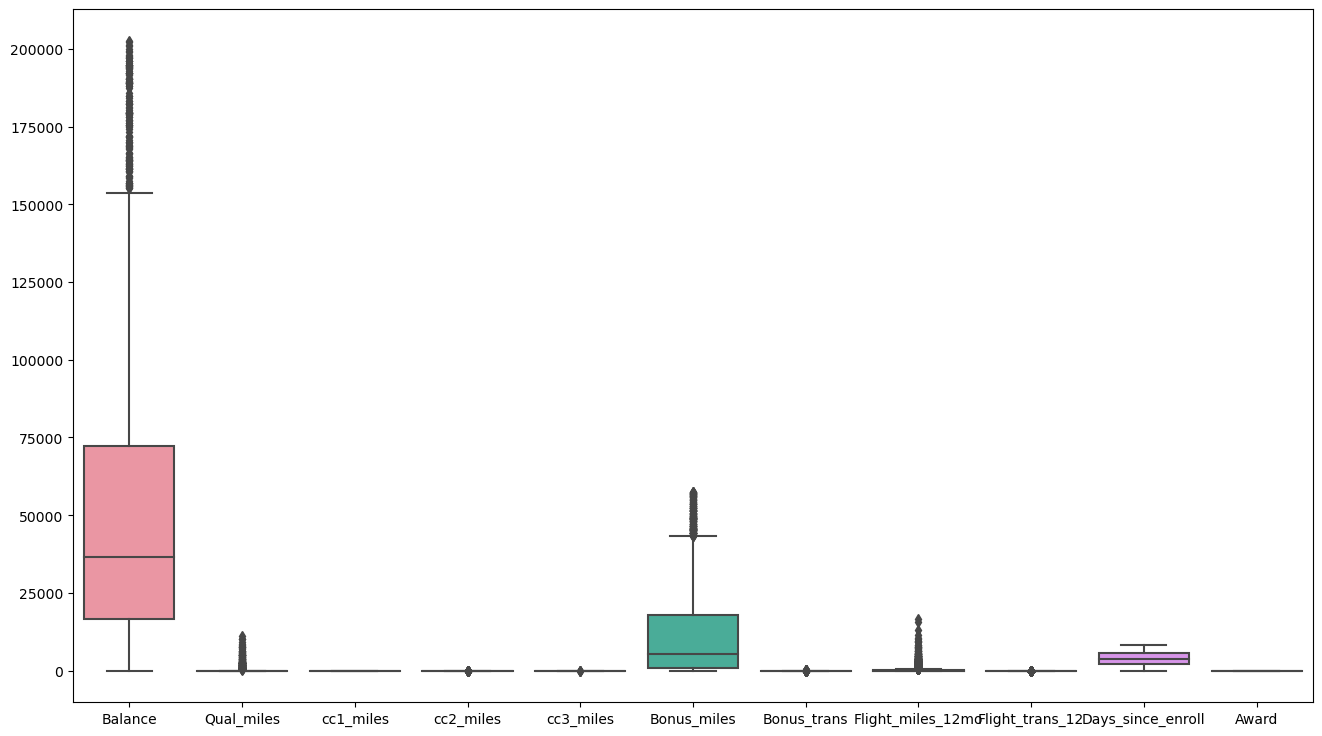

In [104]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df2)

### **Removing the outliers from "Flight_miles_12mo"**

In [105]:
q1 = df['Flight_miles_12mo'].quantile(0.25)
q3 = df['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['Flight_miles_12mo']>ll)&(df2['Flight_miles_12mo']<ul)]

<AxesSubplot:>

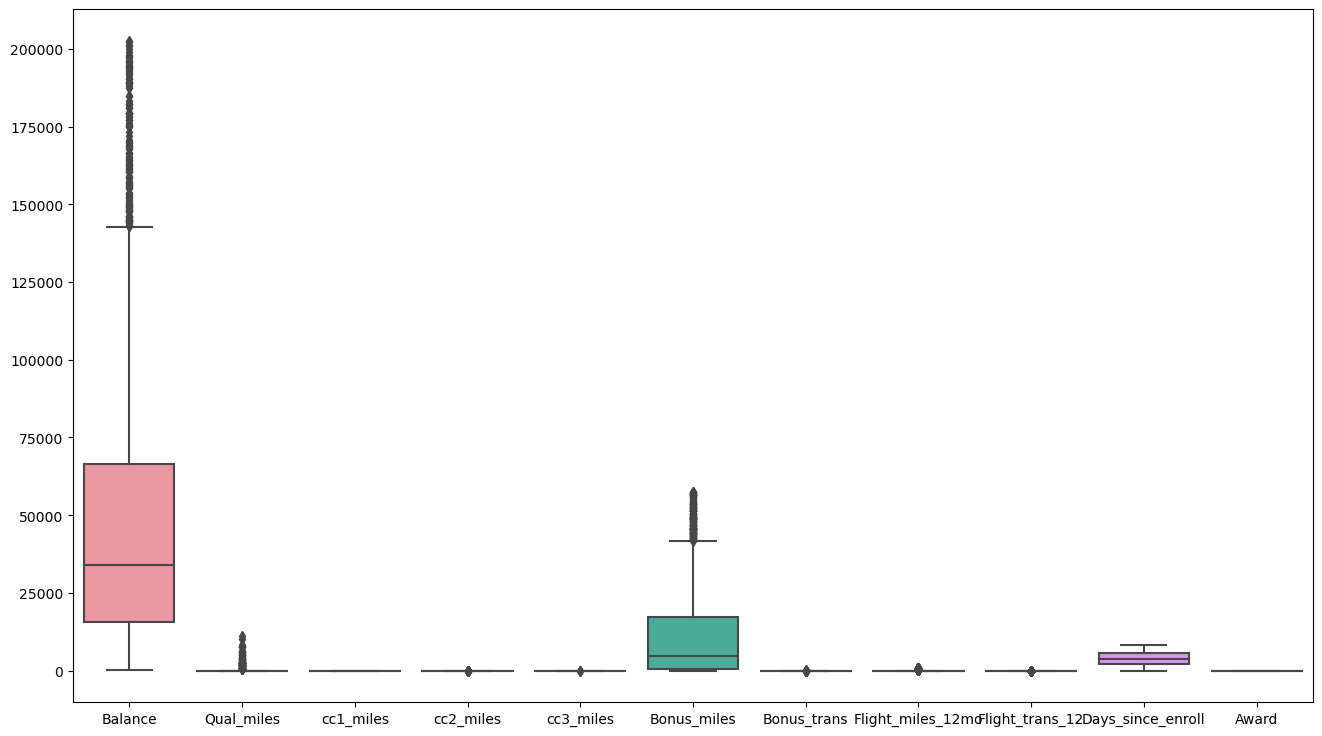

In [106]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df3)

### **Removing the outliers from "Qual_miles"**

In [107]:
q1 = df['Qual_miles'].quantile(0.25)
q3 = df['Qual_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df4 = df3[(df3['Qual_miles']>ll)&(df3['Qual_miles']<ul)]

<AxesSubplot:>

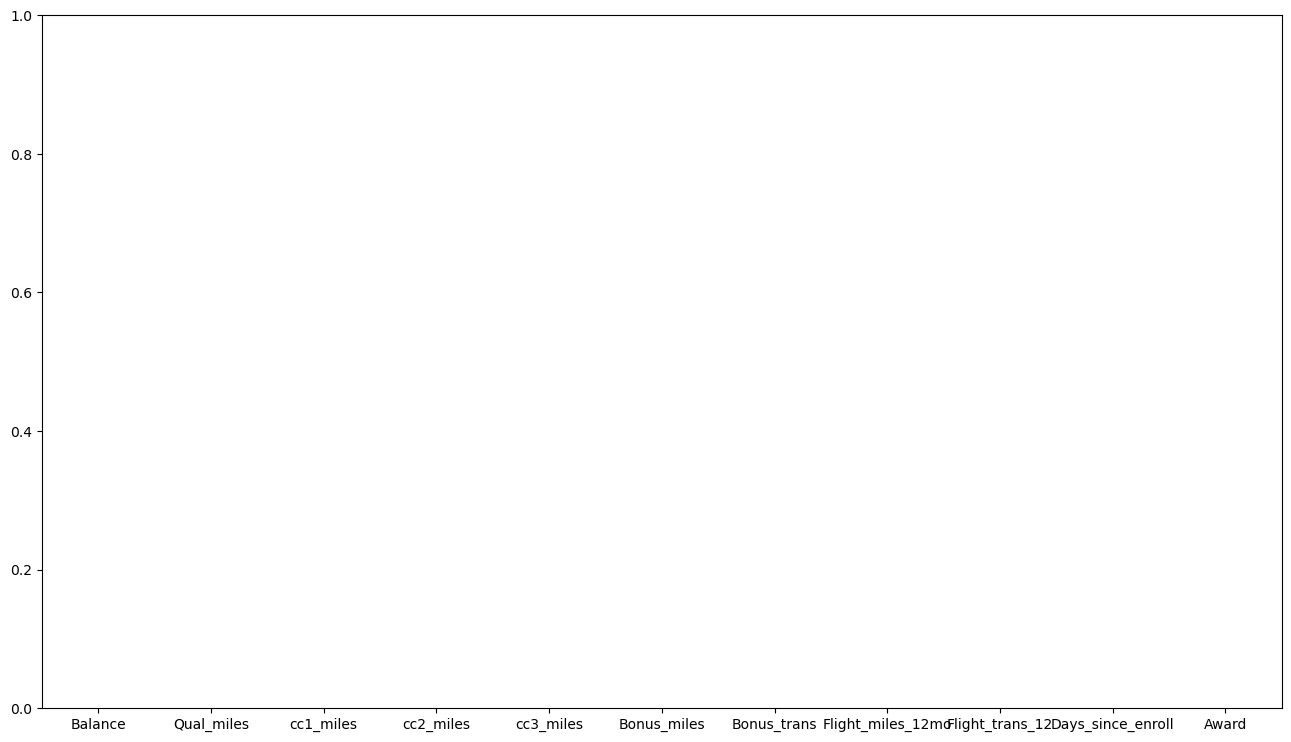

In [108]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df4)

<AxesSubplot:>

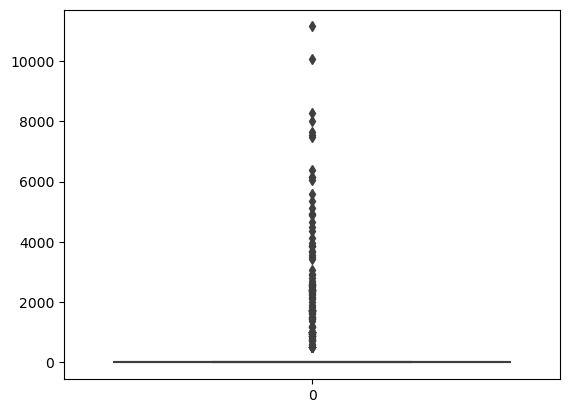

In [109]:
sns.boxplot(df3['Qual_miles'])

The amount of outliers Qual_miles has seems too many (therefore too important) to be removed, so we continue with df3

In [110]:
df3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0


#### **Finalizing the dataframe**

In [112]:
dataset1 =  df3.drop(['Award'], axis=1)
dataset1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942


#### **Our final boxgraphs with Award removed**

<AxesSubplot:>

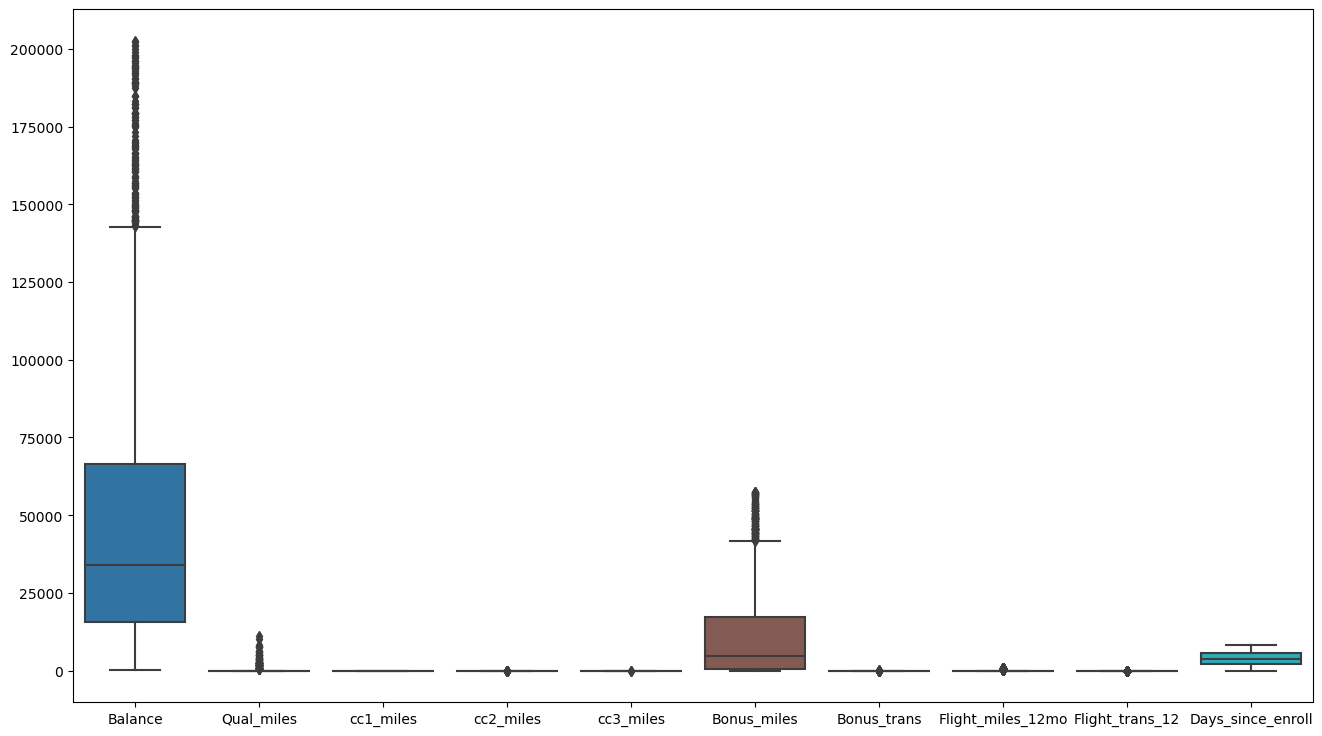

In [113]:
plt.figure(figsize=(16,9))
sns.boxplot(data=dataset1)

#### **Kernel Density for every feature, singled out**

Balance


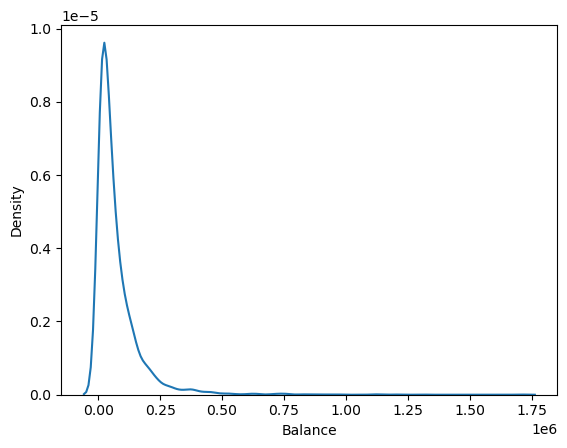

Qual_miles


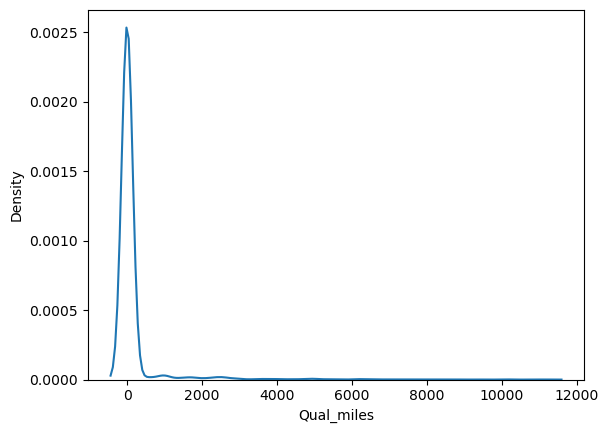

cc1_miles


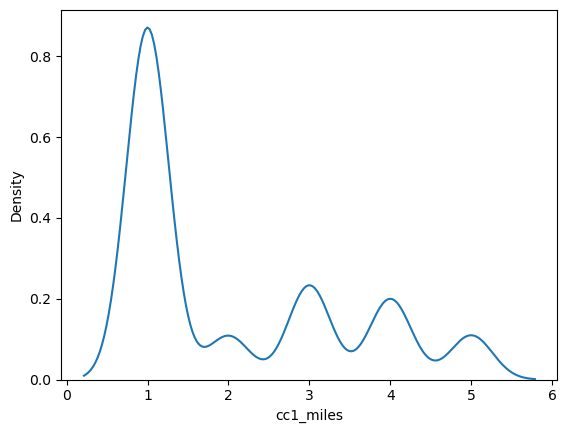

cc2_miles


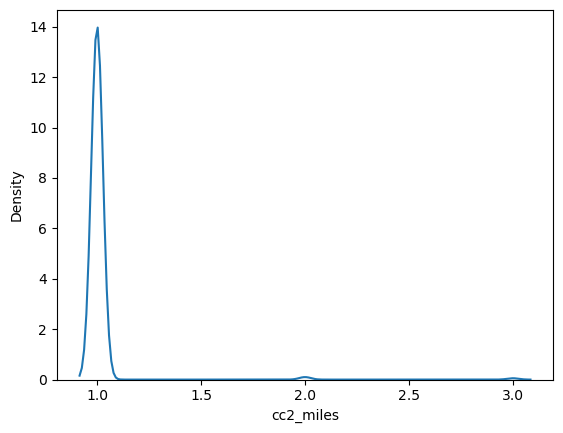

cc3_miles


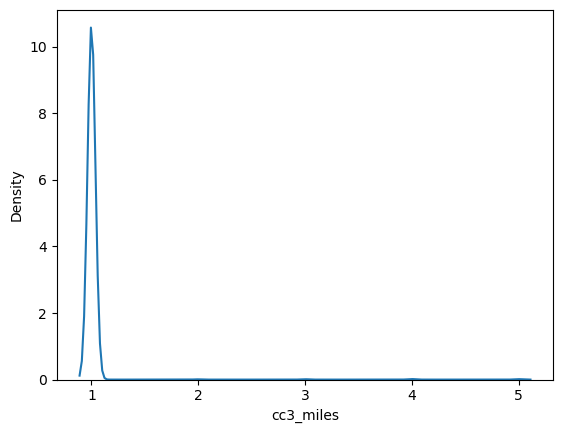

Bonus_miles


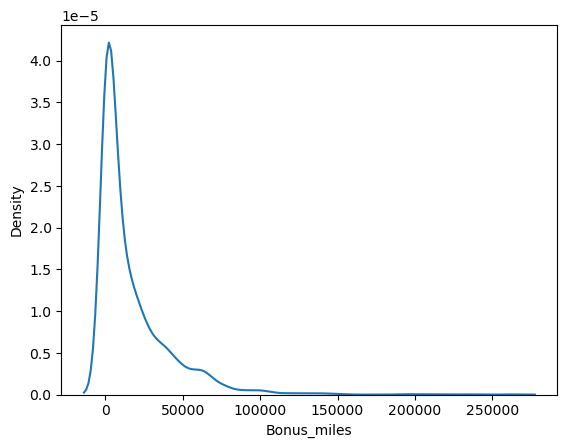

Bonus_trans


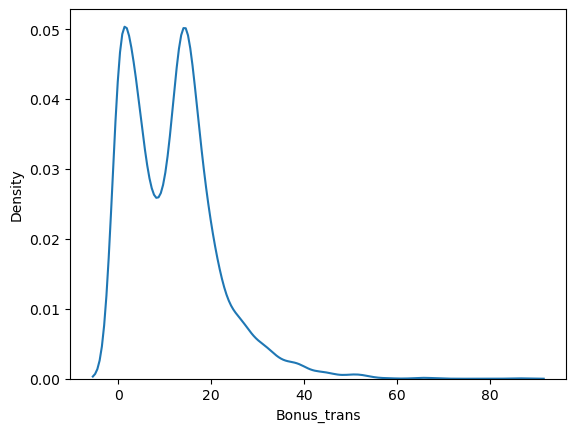

Flight_miles_12mo


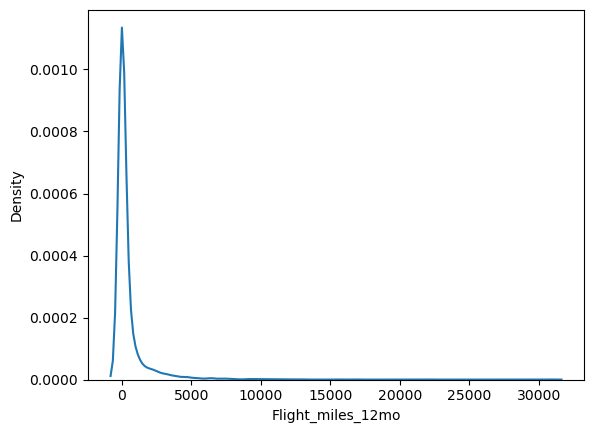

Flight_trans_12


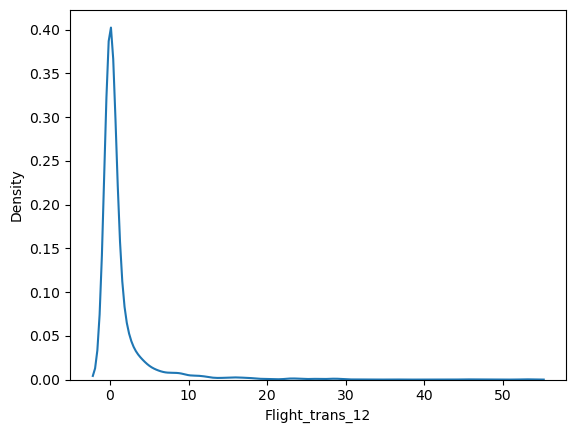

Days_since_enroll


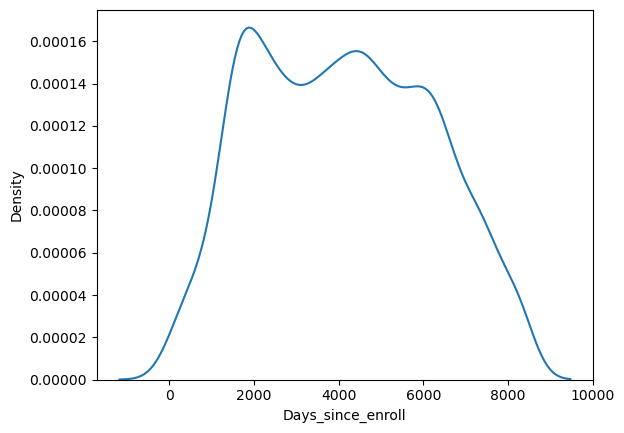

In [114]:
for n in dataset1.columns:
    print(n)
    sns.kdeplot(df[n])
    plt.show()

### **Model**
#### Normalizing the Data

In [117]:
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(dataset1)
df_norm.shape

(3105, 10)

In [119]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

In [120]:
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,31050.000000
1,2,24457.306687
2,3,20678.338023
3,4,18606.124212
4,5,15417.817128
5,6,14170.693895
6,7,11992.437164
7,8,10948.053915
8,9,10074.114564
9,10,9322.053391


#### **Elbow Method for Determining Cluster Amount**

Text(0, 0.5, 'Cluster Errors')

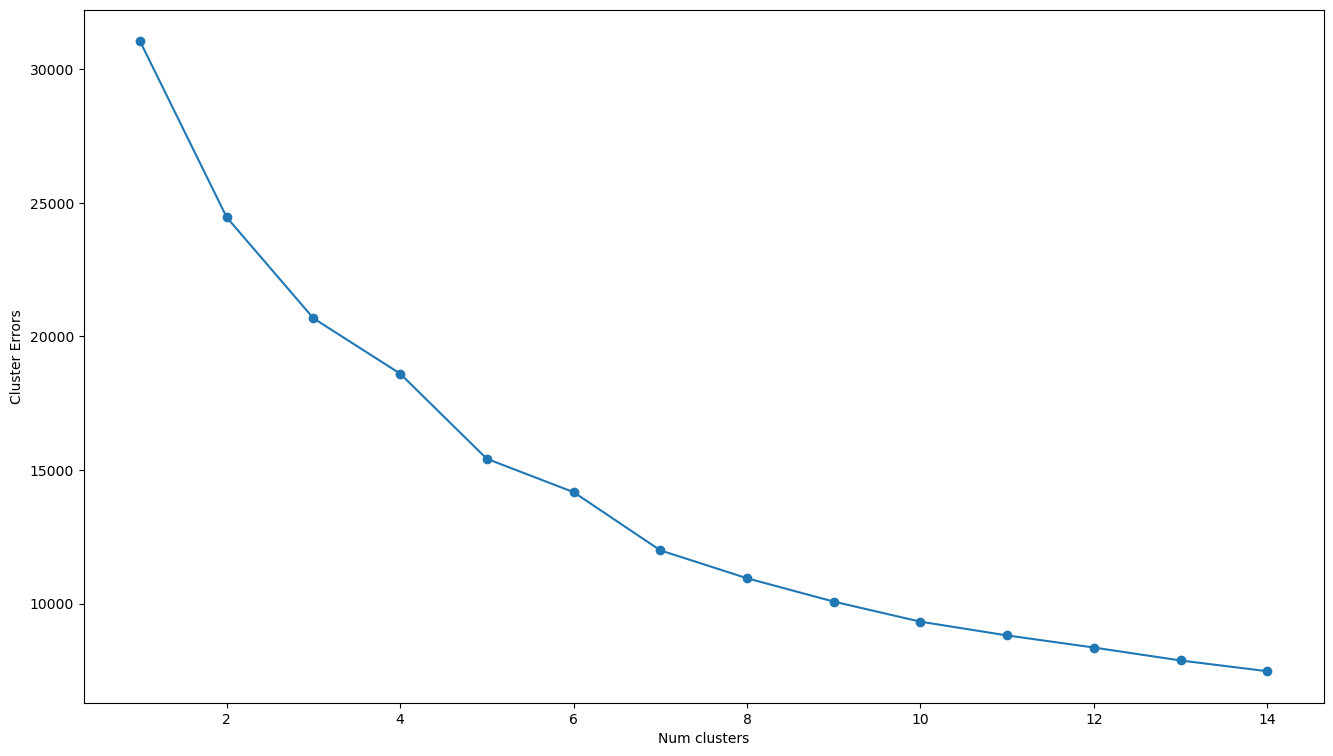

In [122]:
plt.figure(figsize=(16,9))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

### **PCA & the Silhouette Method**

In [123]:
from sklearn.decomposition import PCA

pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df = pca_std.fit_transform(df_norm)

In [124]:
print(pca_std.singular_values_)

[93.47111964 74.7912179  56.44863914 55.83228315 55.63692717 55.0128613
 44.8698796  37.59849223]


#### **Variance contained in each formed PCA**

In [125]:
print(pca_std.explained_variance_ratio_*100)

[28.13800389 18.0152215  10.26231517 10.03943266  9.96930005  9.74690792
  6.4840776   4.55280714]


#### **Cummulative variance ratio**

In [126]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([28.13800389, 46.15322539, 56.41554056, 66.45497322, 76.42427326,
       86.17118118, 92.65525878, 97.20806592])

#### Applying PCA on standardized data with 95% variance gives 8 PCA components

### **Running PCA of MinMaxscalar data.**

In [127]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3105, 10)

#### **applying PCA on minmax_df**

In [128]:
pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [130]:
print(pca_minmax.singular_values_)

[22.39660889 13.63099503 13.10616173  9.71410745  6.67146314  4.76875804]


#### **variance containing in each formed PCA**

In [131]:
print(pca_minmax.explained_variance_ratio_*100)

[47.5446088  17.61131825 16.28125175  8.94422163  4.21870277  2.15549649]


#### Applying PCA on MinMaxscaler transformation data gives 5 PCA components

### **The Sillhouette Method**

In [136]:
clust_list = [2,3,4,5,6,7,8,9]

####  Silhouette score for stadardized data with PCA applied

In [137]:
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3227080569502102
For n_clusters = 3 The average silhouette_score is : 0.3512845203919485
For n_clusters = 4 The average silhouette_score is : 0.3655663168762155
For n_clusters = 5 The average silhouette_score is : 0.36594274381695224
For n_clusters = 6 The average silhouette_score is : 0.375096572004536
For n_clusters = 7 The average silhouette_score is : 0.28785182082845
For n_clusters = 8 The average silhouette_score is : 0.25757781606671487
For n_clusters = 9 The average silhouette_score is : 0.2711410198588763


#### Silhouette score for MinMaxScalar transformation data with PCA Applied.


In [135]:
for n_clusters in clust_list:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.23479053568959424
For n_clusters = 3 The average silhouette_score is : 0.23479053568959424
For n_clusters = 4 The average silhouette_score is : 0.23479053568959424
For n_clusters = 5 The average silhouette_score is : 0.23479053568959424
For n_clusters = 6 The average silhouette_score is : 0.23479053568959424
For n_clusters = 7 The average silhouette_score is : 0.23479053568959424
For n_clusters = 8 The average silhouette_score is : 0.23479053568959424
For n_clusters = 9 The average silhouette_score is : 0.23479053568959424


#### **According the the silhouette score of:**

* The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.37

* The MinMaxScalar transformation data, it is the same for any number of cluster, and is equal to 0.23 0.37 > 0.23, therefore we proceed with the standardized data with 6 clusters

### **Hierarchial Clustering**

#### Hierarchial Clustering with single linkage:

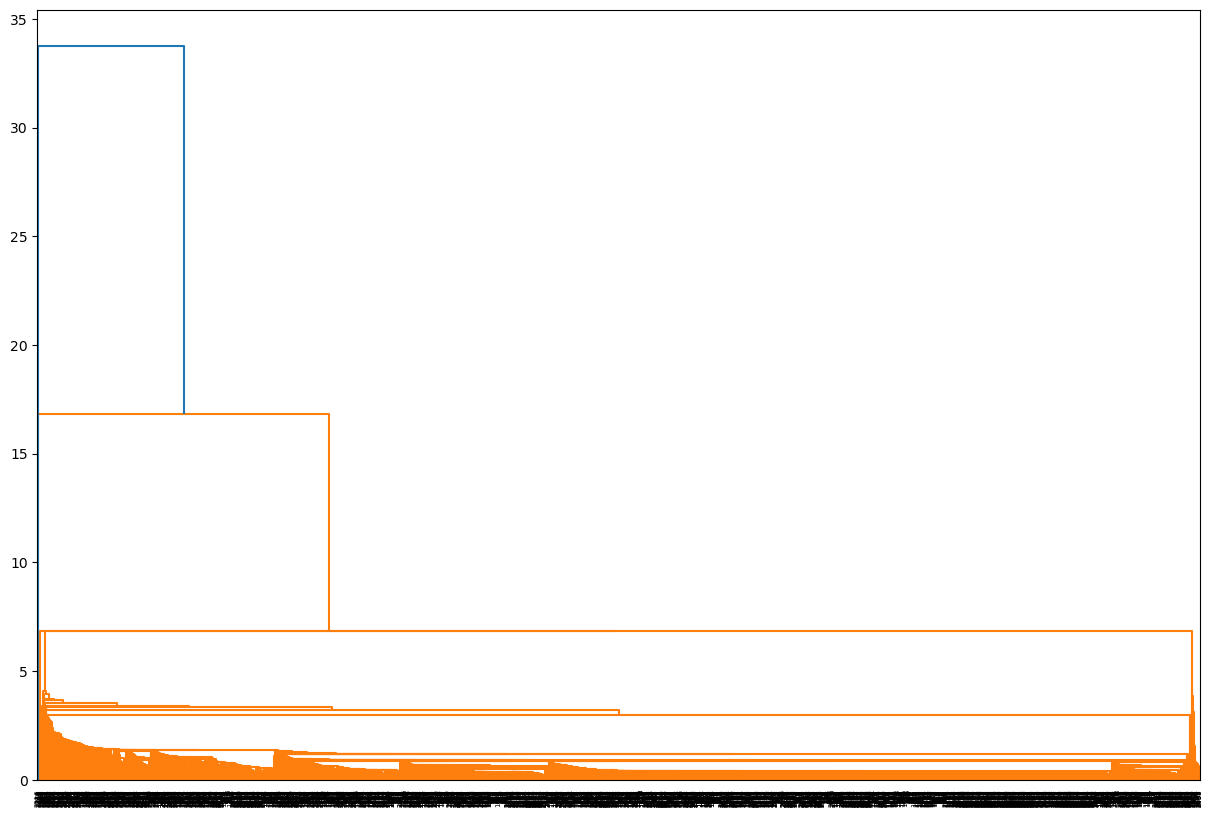

In [138]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

#### Hierarchial Clustering with complete linkage as instructed:

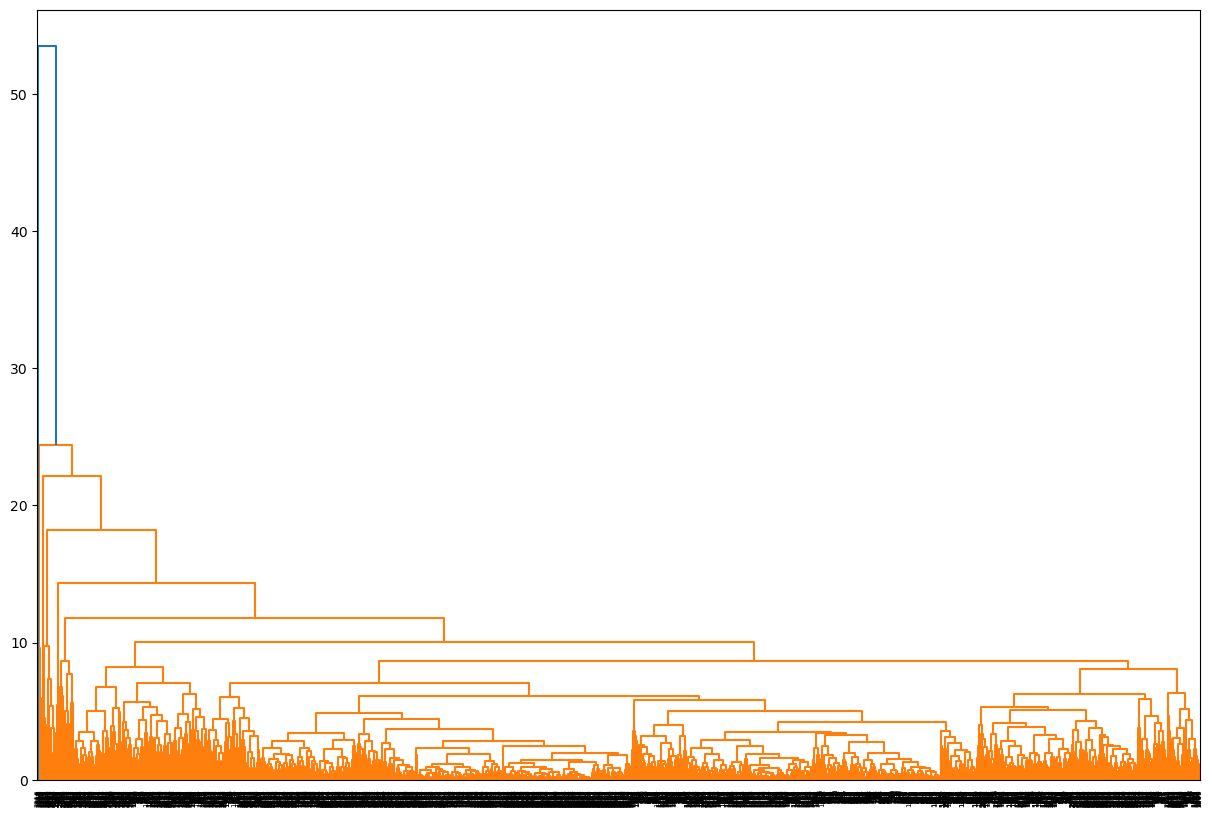

In [139]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

#### Hierarchial Clustering with average linkage:

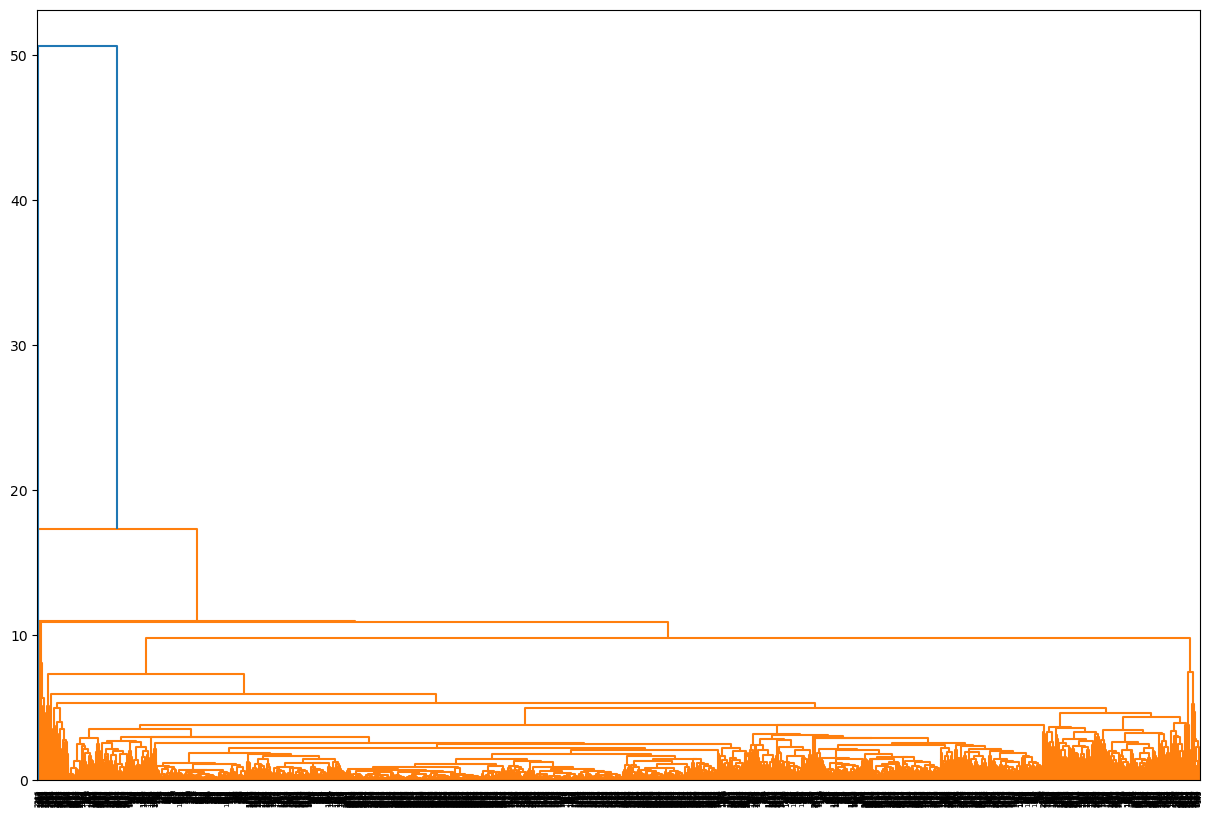

In [140]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

#### Applying Dendrogram on PCA data using different linkage methods. 
#### We can see number of clusters using color coding of dendrogram. Each color indicates one cluster.

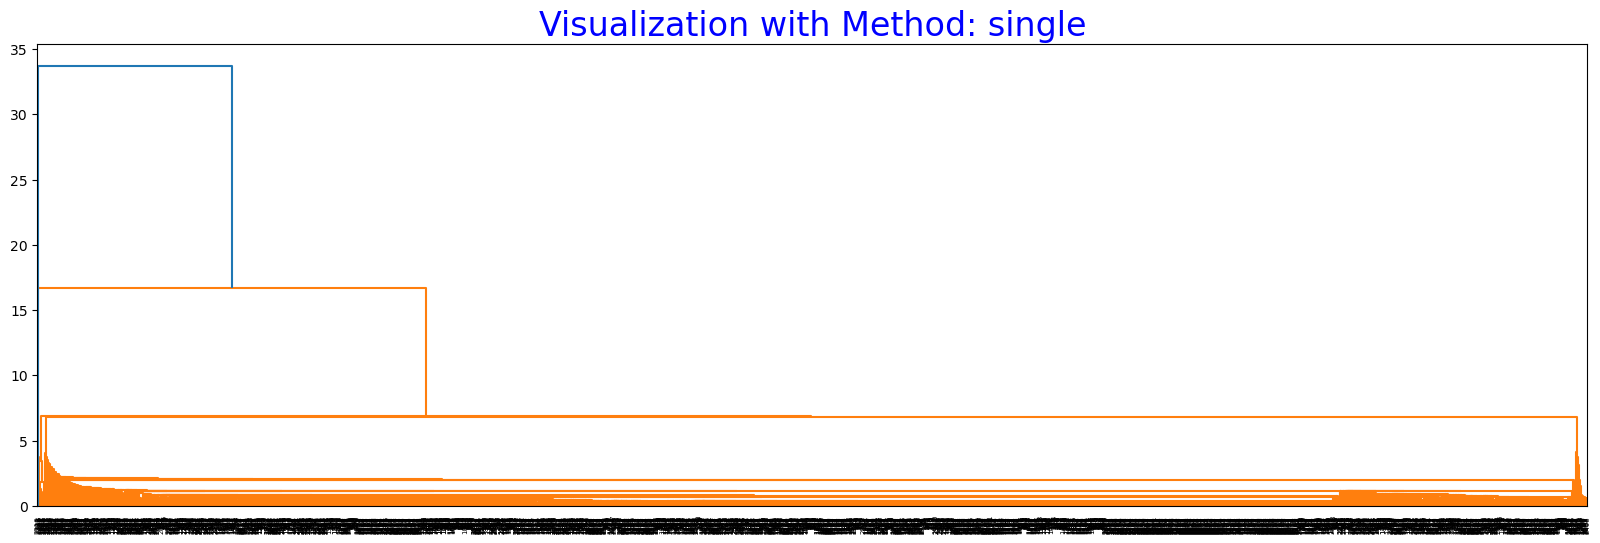

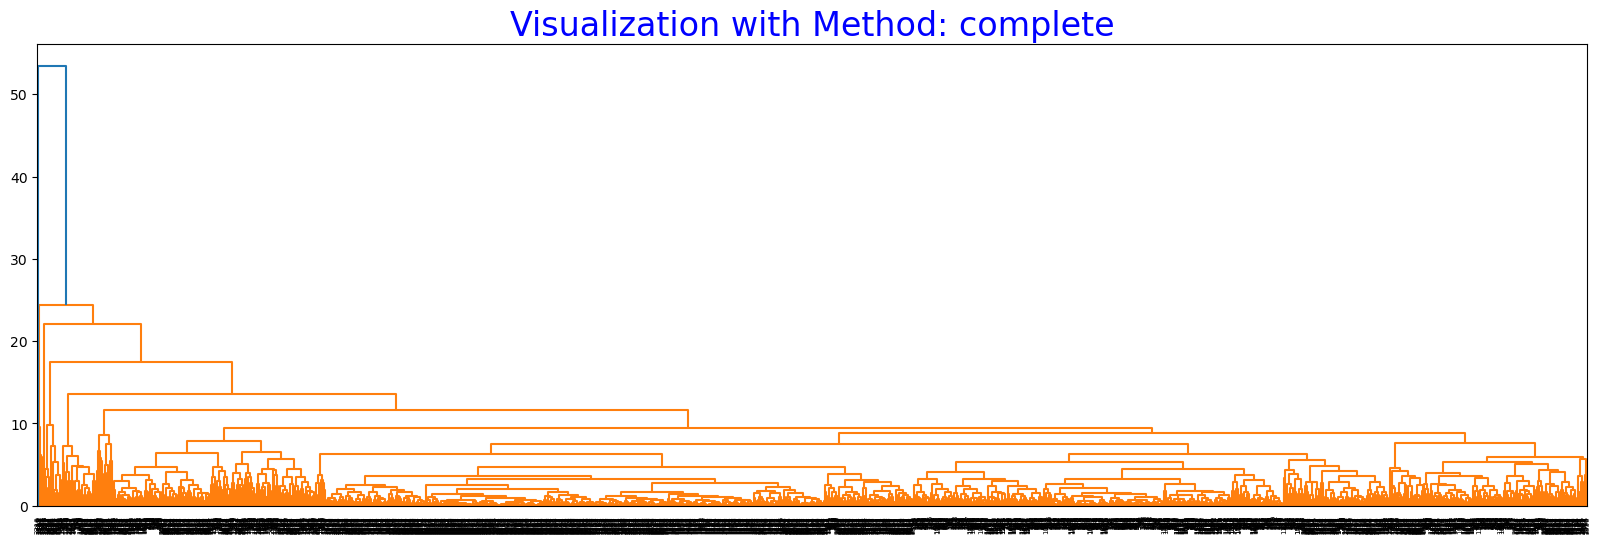

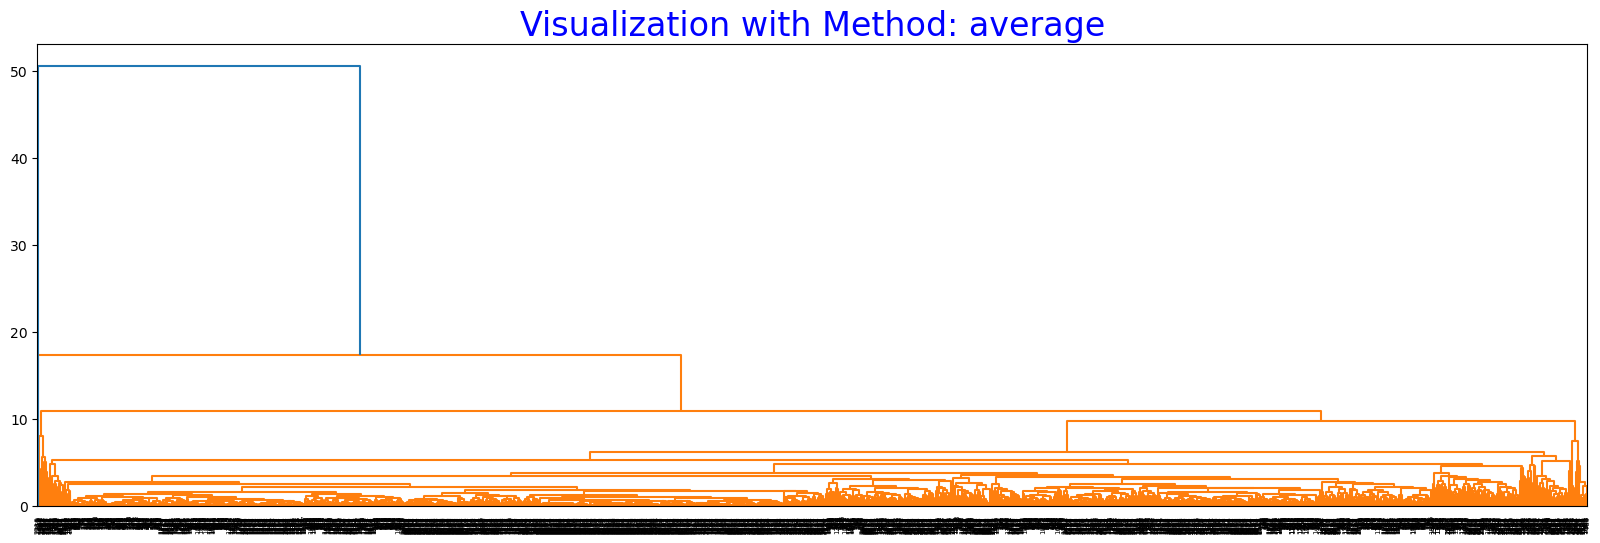

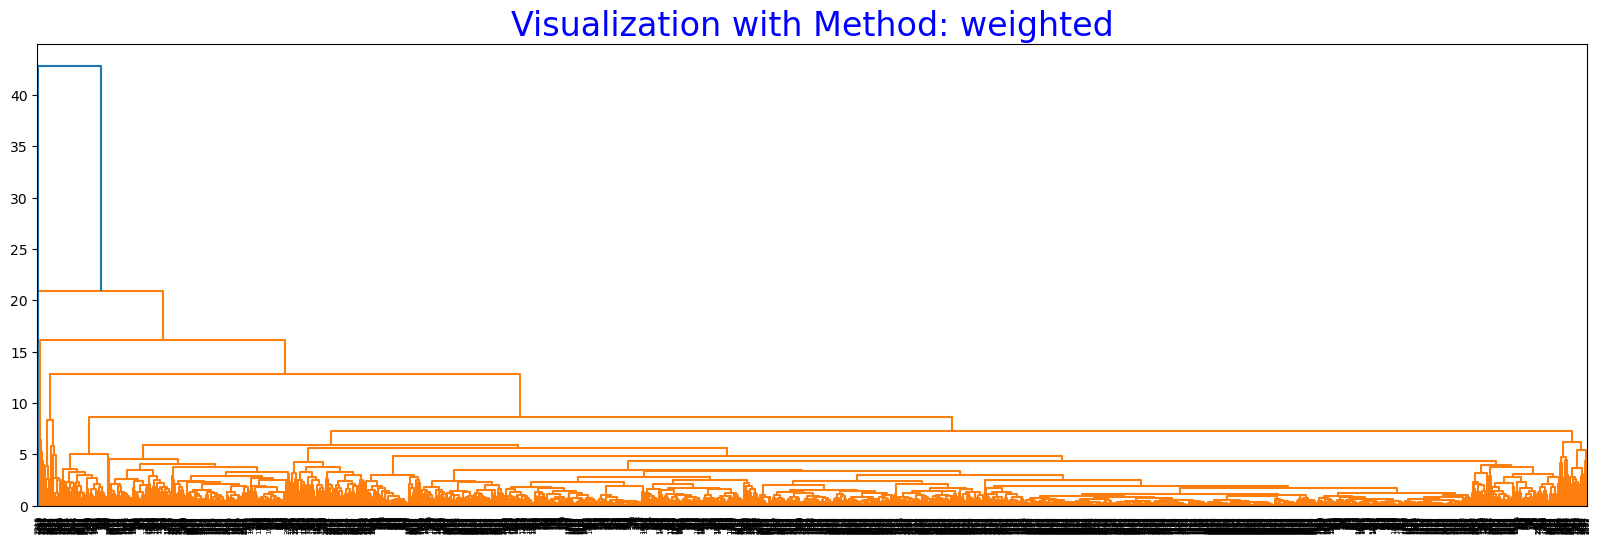

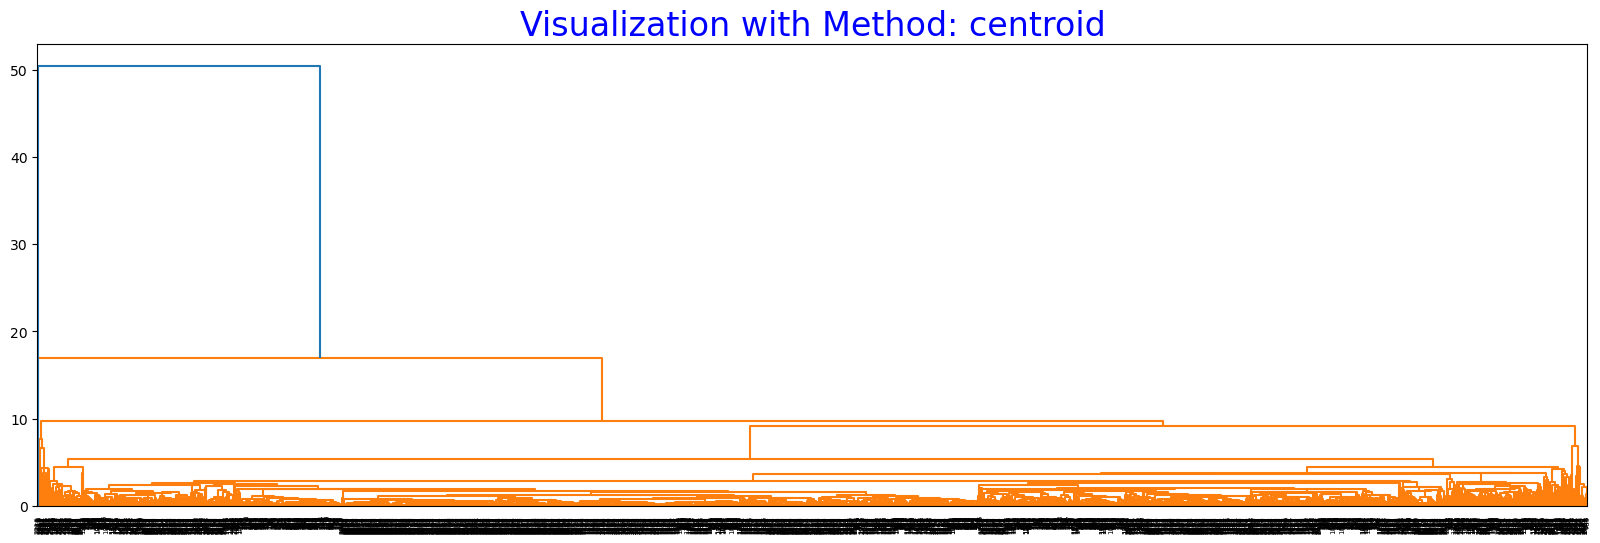

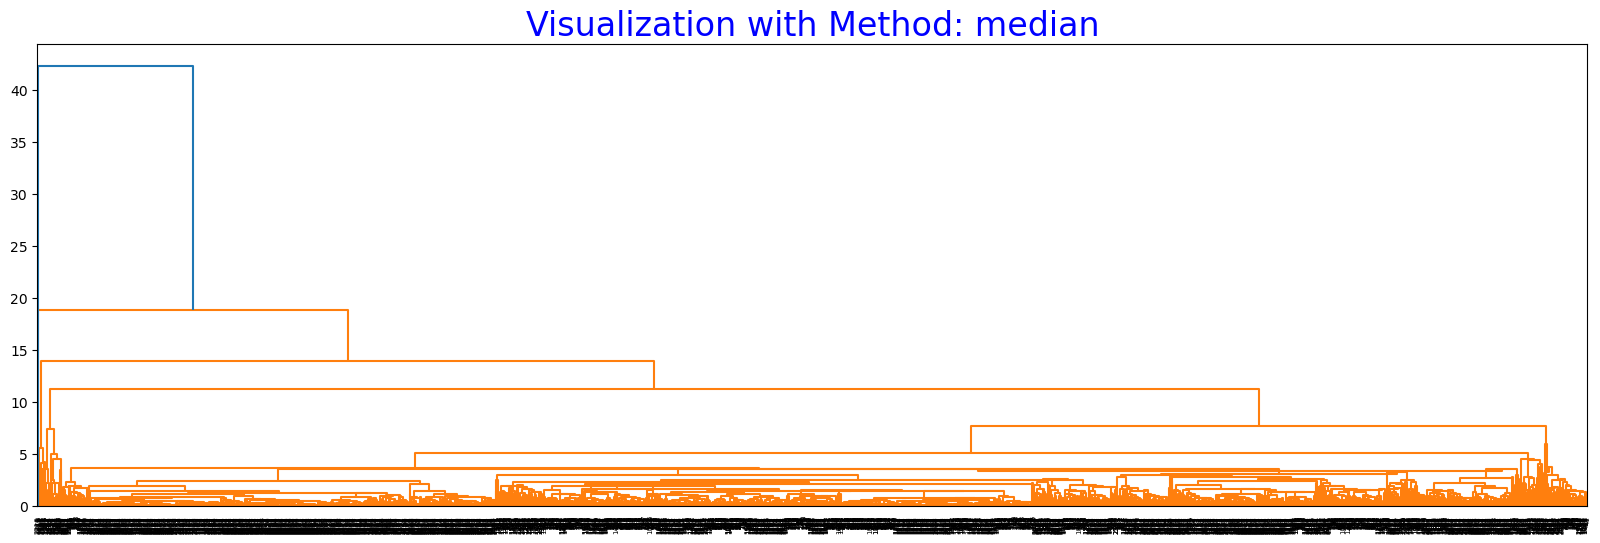

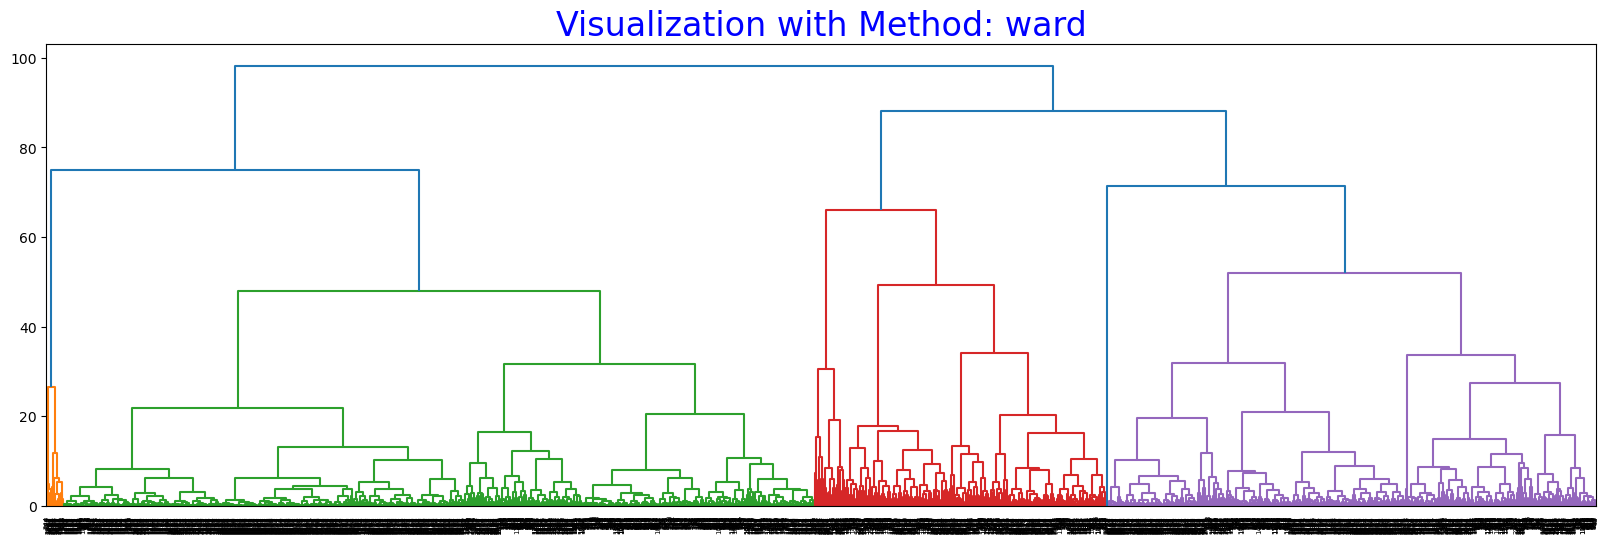

In [144]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualization with Method: {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_df, method = methods,optimal_ordering=False))

### **Building Unsupervised KMeans Model**

In [145]:
model1 = KMeans(n_clusters = 5, max_iter=50)
model1.fit(pca_std_df)

KMeans(max_iter=50, n_clusters=5)

#### **analysis of clusters formed**

In [146]:
dataset1.index = pd.RangeIndex(len(dataset1.index))
df_km = pd.concat([dataset1,pd.Series(model1.labels_)],axis=1)
df_km.columns = ["Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles", "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll", "ClusterID"]   

In [147]:
df_km

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,ClusterID
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3100,18476,0,1,1,1,8525,4,200,1,1403,0
3101,64385,0,1,1,1,981,5,0,0,1395,0
3102,73597,0,3,1,1,25447,8,0,0,1402,2
3103,54899,0,1,1,1,500,1,500,1,1401,1


In [148]:
dataset1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,16420,0,1,1,1,0,0,0,0,6942


In [149]:
km_cluster_Balance = pd.DataFrame(df_km.groupby('ClusterID')['Balance'].mean())
km_cluster_Qual_miles = pd.DataFrame(df_km.groupby('ClusterID')['Qual_miles'].mean())
km_cluster_cc1_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc1_miles'].mean())
km_cluster_cc2_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc2_miles'].mean())
km_cluster_cc3_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc3_miles'].mean())
km_cluster_Bonus_miles = pd.DataFrame(df_km.groupby('ClusterID')['Bonus_miles'].mean())
km_cluster_Bonus_trans = pd.DataFrame(df_km.groupby('ClusterID')['Bonus_trans'].mean())
km_cluster_Flight_miles_12mo = pd.DataFrame(df_km.groupby('ClusterID')['Flight_miles_12mo'].mean())
km_cluster_Flight_trans_12 = pd.DataFrame(df_km.groupby('ClusterID')['Flight_trans_12'].mean())
km_cluster_Days_since_enroll = pd.DataFrame(df_km.groupby('ClusterID')['Days_since_enroll'].mean())

df = pd.concat([pd.Series([1,2,3,4,5]),
km_cluster_Balance,
km_cluster_Qual_miles,
km_cluster_cc1_miles,
km_cluster_cc2_miles,
km_cluster_cc3_miles,
km_cluster_Bonus_miles,
km_cluster_Bonus_trans,
km_cluster_Flight_miles_12mo,
km_cluster_Flight_trans_12,
km_cluster_Days_since_enroll],axis=1)
df.columns = ["ClusterID","Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles",  "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll"]
df

,ClusterID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,29010.948718,61.899715,1.091168,1.000000,1.000000,2966.891738,5.549288,6.875783,0.047863,3590.458689
1,2,62806.534247,236.257534,1.660274,1.000000,1.000000,10146.912329,9.830137,475.578082,1.876712,3995.268493
2,3,76566.988421,108.843158,3.253684,1.000000,1.002105,26250.800000,16.716842,32.449474,0.138947,4516.498947
3,4,61474.000000,0.000000,1.000000,1.000000,4.000000,47717.000000,14.000000,0.000000,0.000000,3354.000000
4,5,40919.558824,0.000000,1.088235,2.323529,1.000000,12405.235294,14.647059,75.000000,0.382353,3827.235294


#### **Analyzing Clusters**

<AxesSubplot:xlabel='ClusterID', ylabel='Balance'>

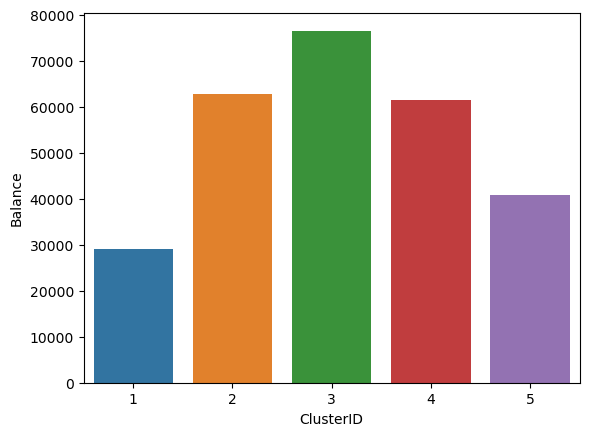

In [150]:
sns.barplot(data=df,x='ClusterID',y='Balance')

<AxesSubplot:xlabel='ClusterID', ylabel='Qual_miles'>

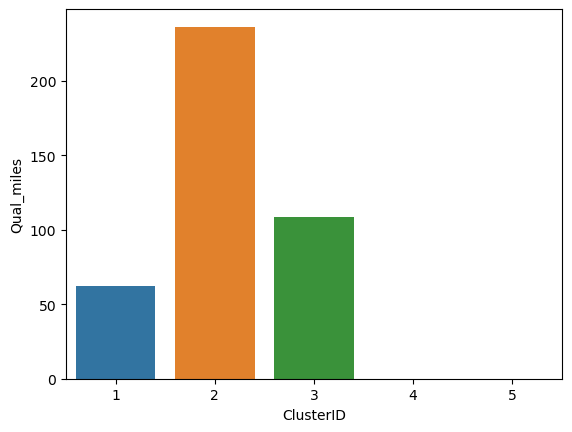

In [151]:
sns.barplot(data=df,x='ClusterID',y='Qual_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc1_miles'>

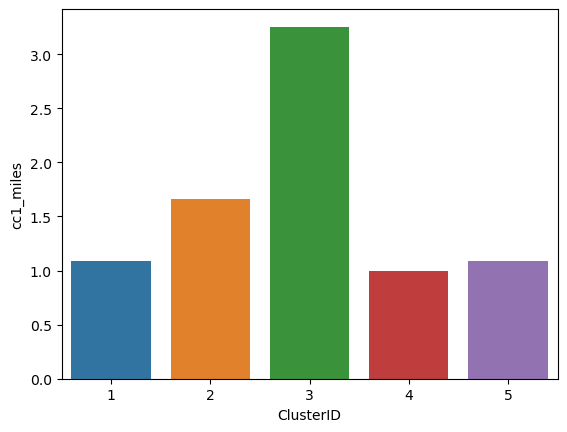

In [152]:
sns.barplot(data=df,x='ClusterID',y='cc1_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc2_miles'>

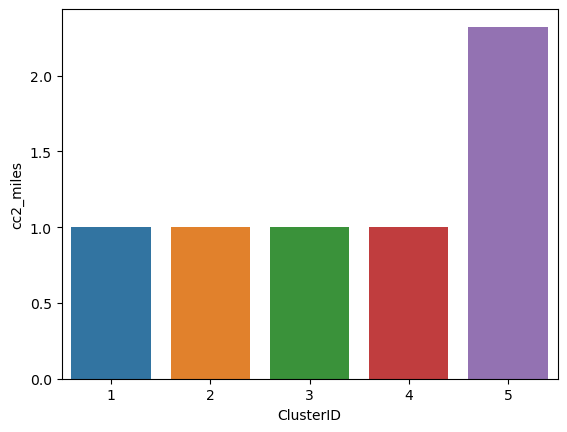

In [153]:
sns.barplot(data=df,x='ClusterID',y='cc2_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc3_miles'>

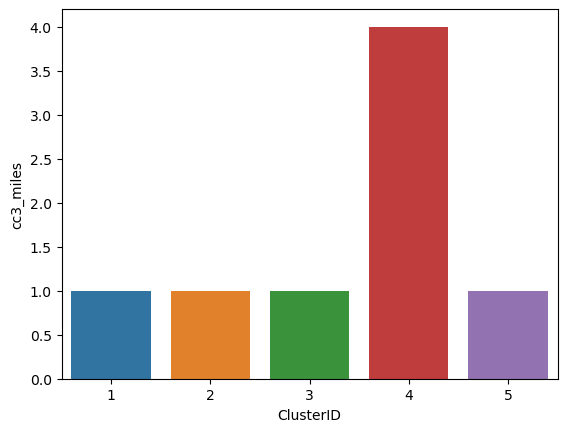

In [154]:
sns.barplot(data=df,x='ClusterID',y='cc3_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='Bonus_miles'>

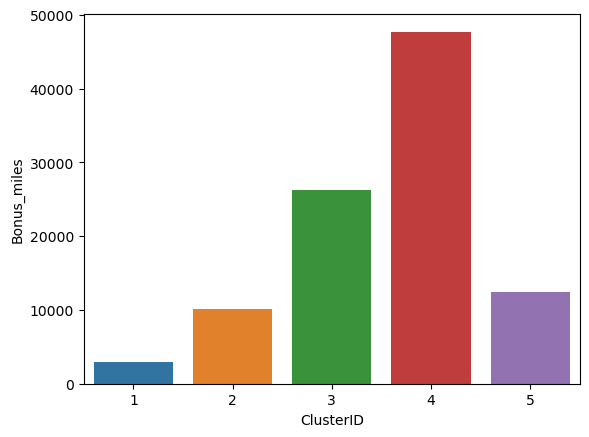

In [155]:
sns.barplot(data=df,x='ClusterID',y='Bonus_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='Bonus_trans'>

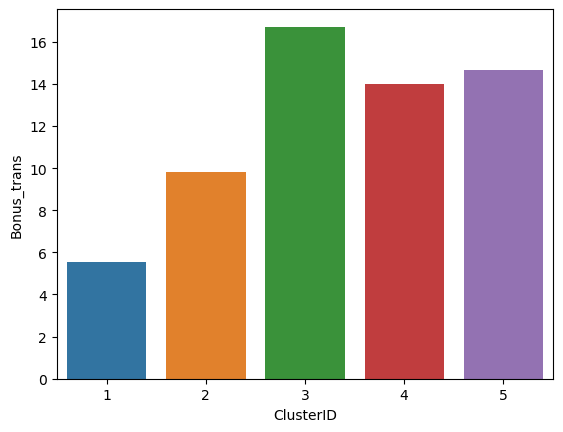

In [156]:
sns.barplot(data=df,x='ClusterID',y='Bonus_trans')

<AxesSubplot:xlabel='ClusterID', ylabel='Flight_miles_12mo'>

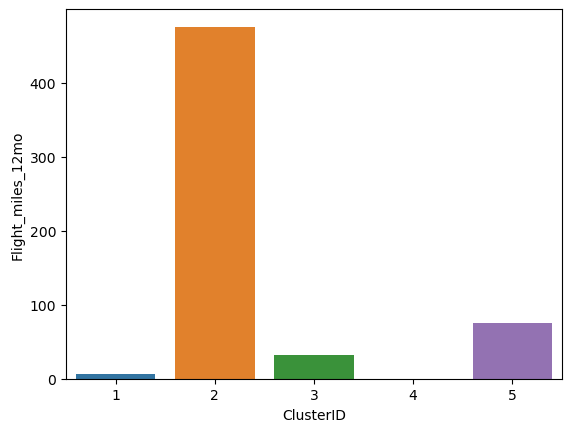

In [157]:
sns.barplot(data=df,x='ClusterID',y='Flight_miles_12mo')

<AxesSubplot:xlabel='ClusterID', ylabel='Flight_trans_12'>

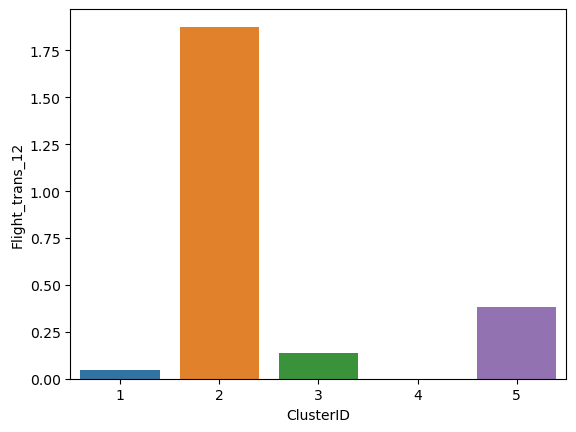

In [158]:
sns.barplot(data=df,x='ClusterID',y='Flight_trans_12')

<AxesSubplot:xlabel='ClusterID', ylabel='Days_since_enroll'>

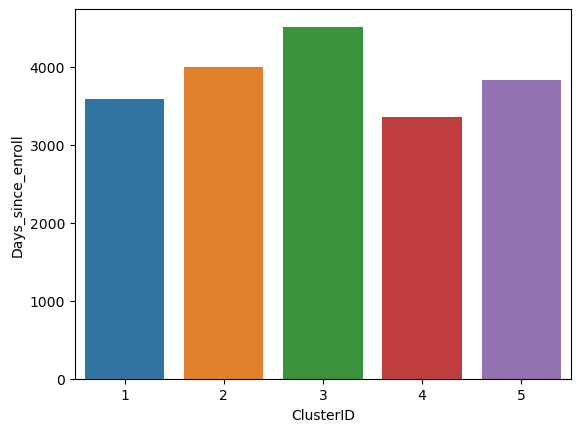

In [159]:
sns.barplot(data=df,x='ClusterID',y='Days_since_enroll')

In [160]:
df.columns

Index(['ClusterID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles',
       'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Days_since_enroll'],
      dtype='object')

In [161]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [162]:
Kmeans_df = pd.concat([dataset1.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Kmeans_Clustering
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,16420,0,1,1,1,0,0,0,0,6942,0


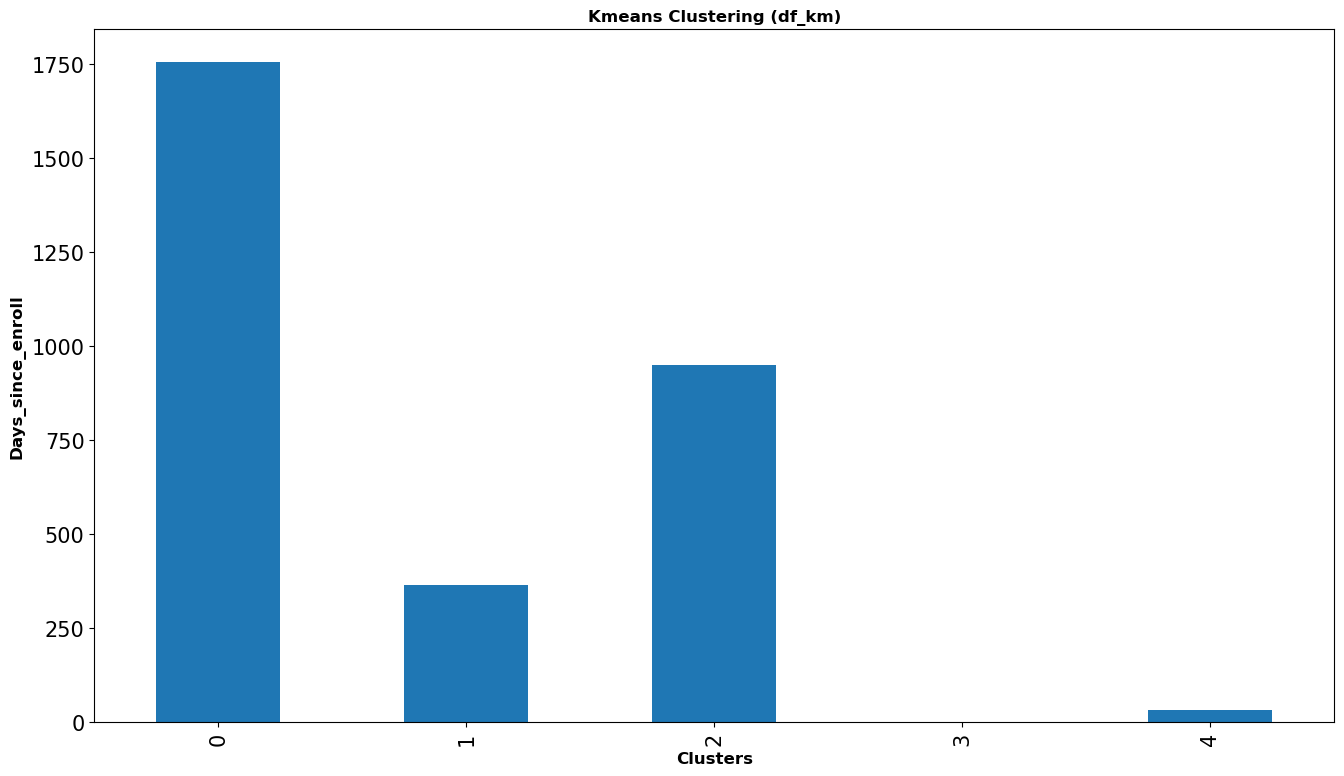

In [163]:
fig, ax = plt.subplots(figsize=(16, 9))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Days_since_enroll')
plt.title('Kmeans Clustering (df_km)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Days_since_enroll', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### **Analyzing Clusters' Strong Points**

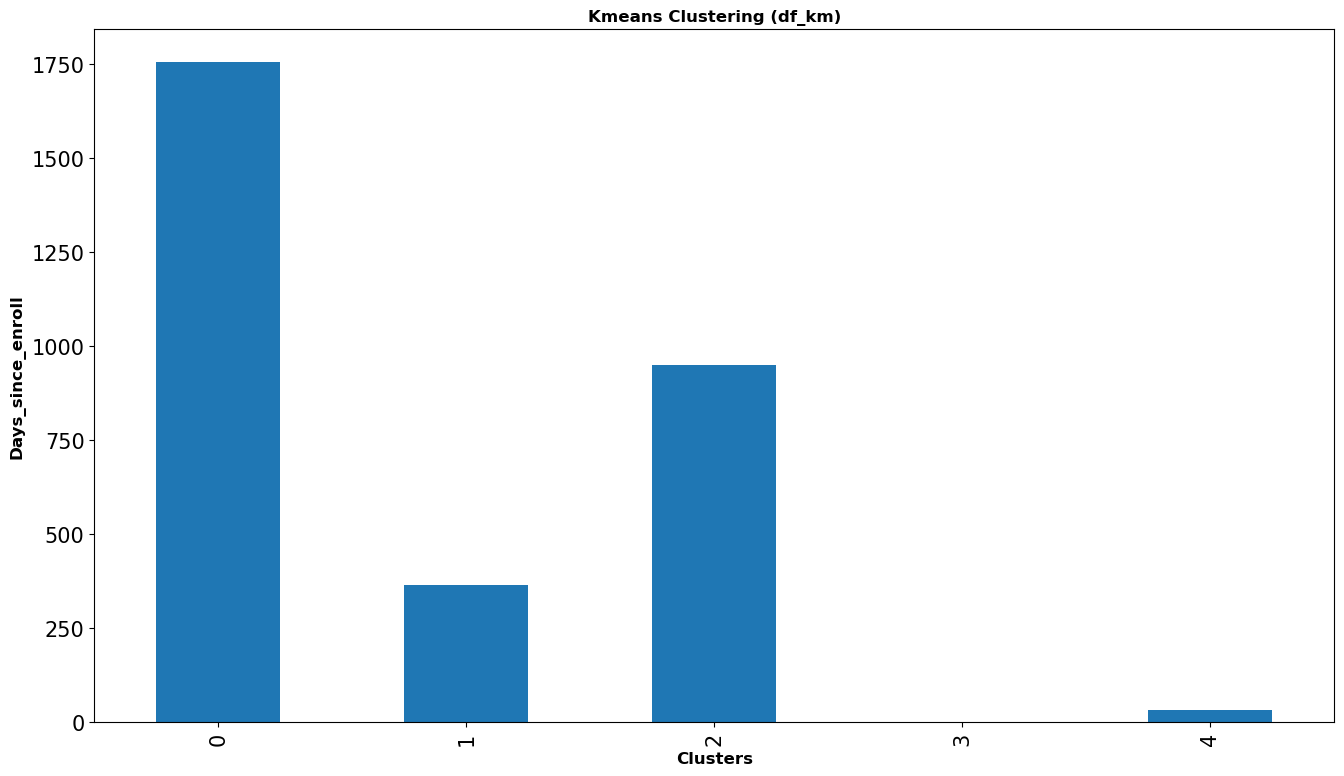

In [167]:
fig, ax = plt.subplots(figsize=(16, 9))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Days_since_enroll')
plt.title('Kmeans Clustering (df_km)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Days_since_enroll', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#### **Sorting elements based on cluster label assigned and taking average for insights.**

In [168]:
cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster_1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster_2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster_3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster_4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster_5_avg'])

In [169]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster_1_avg,Cluster_2_avg,Cluster_3_avg,Cluster_4_avg,Cluster_5_avg
Balance,29010.948718,62806.534247,76566.988421,61474.0,40919.558824
Qual_miles,61.899715,236.257534,108.843158,0.0,0.000000
cc1_miles,1.091168,1.660274,3.253684,1.0,1.088235
cc2_miles,1.000000,1.000000,1.000000,1.0,2.323529
cc3_miles,1.000000,1.000000,1.002105,4.0,1.000000
Bonus_miles,2966.891738,10146.912329,26250.800000,47717.0,12405.235294
Bonus_trans,5.549288,9.830137,16.716842,14.0,14.647059
Flight_miles_12mo,6.875783,475.578082,32.449474,0.0,75.000000
Flight_trans_12,0.047863,1.876712,0.138947,0.0,0.382353
Days_since_enroll,3590.458689,3995.268493,4516.498947,3354.0,3827.235294


#### **Looking at the bar plots all together once again**

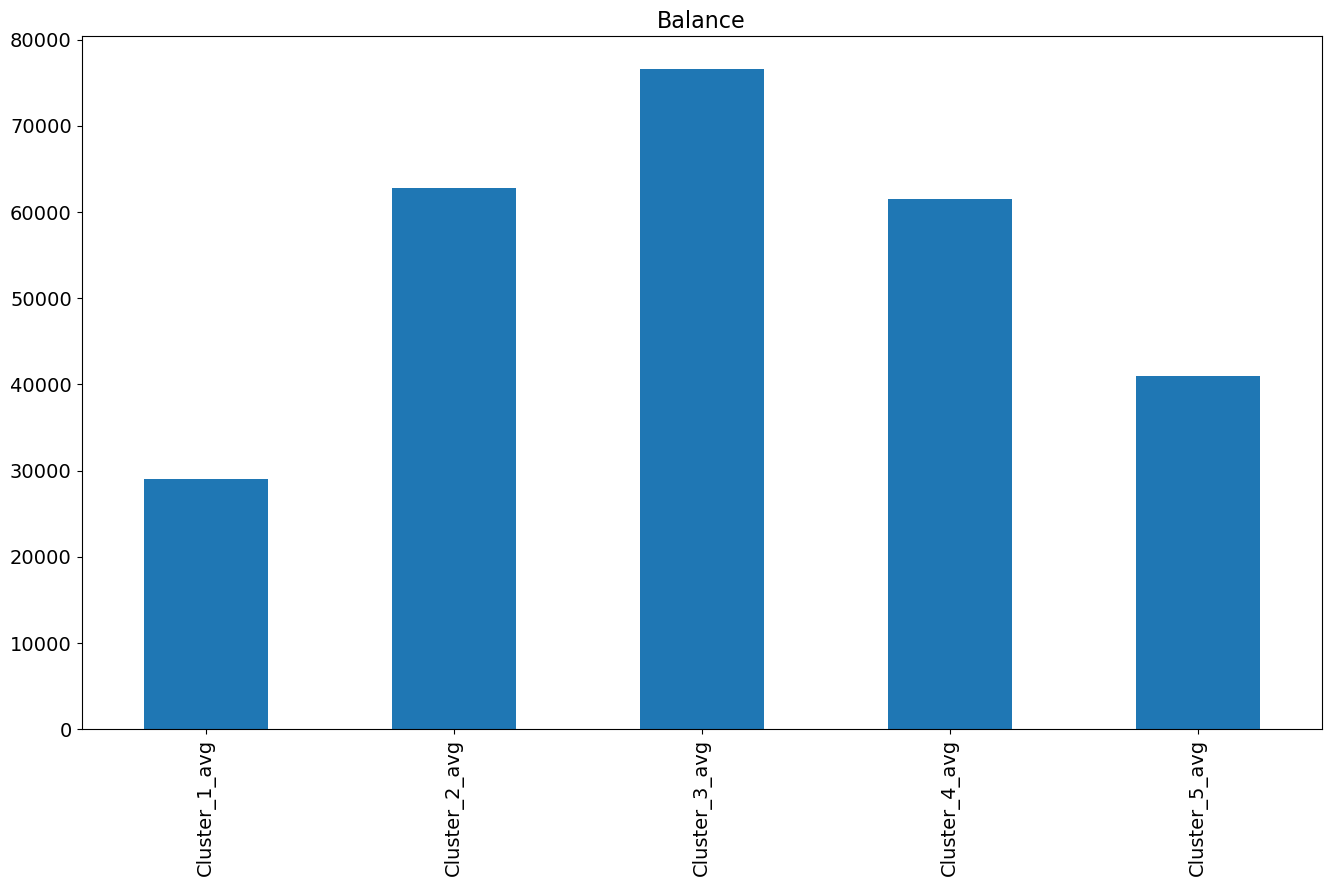

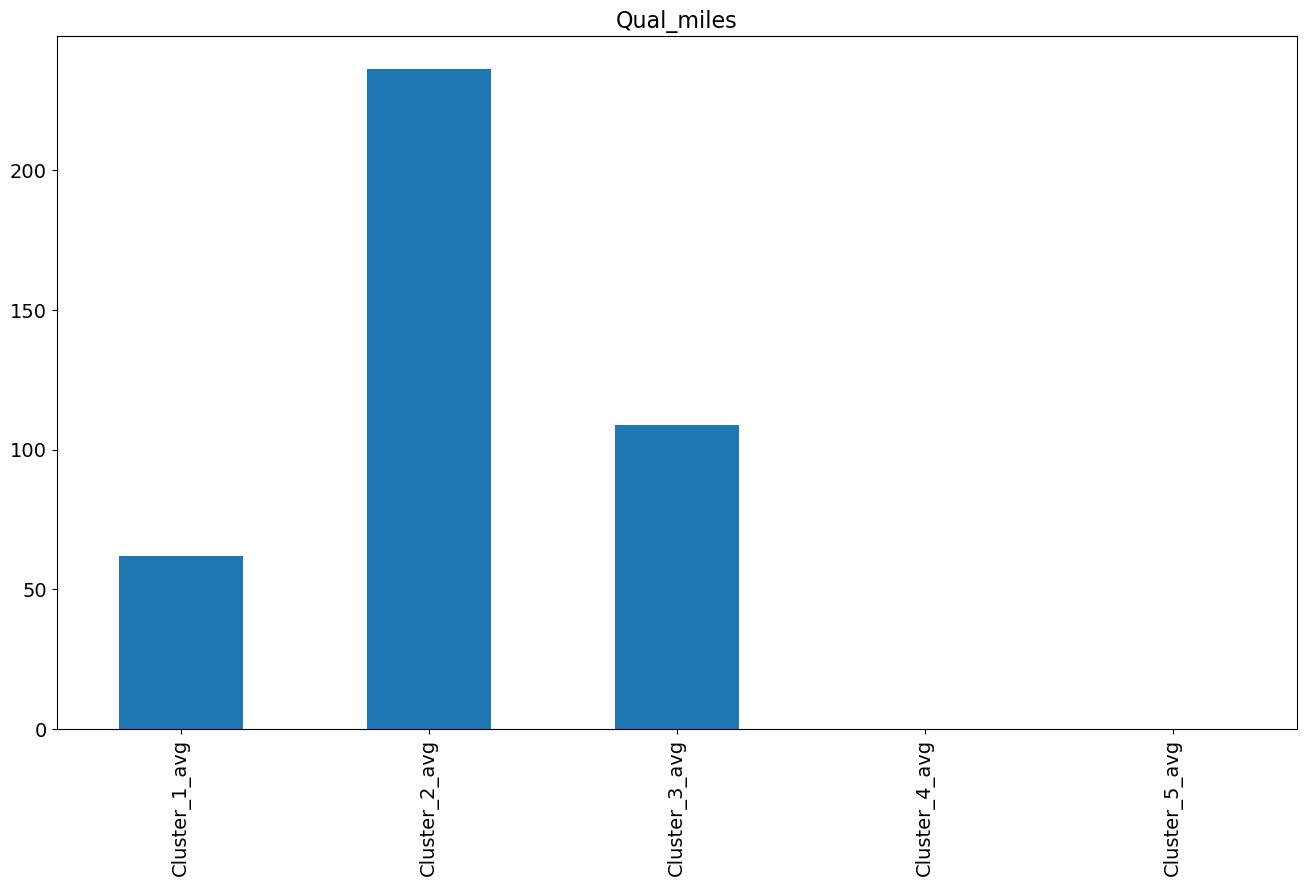

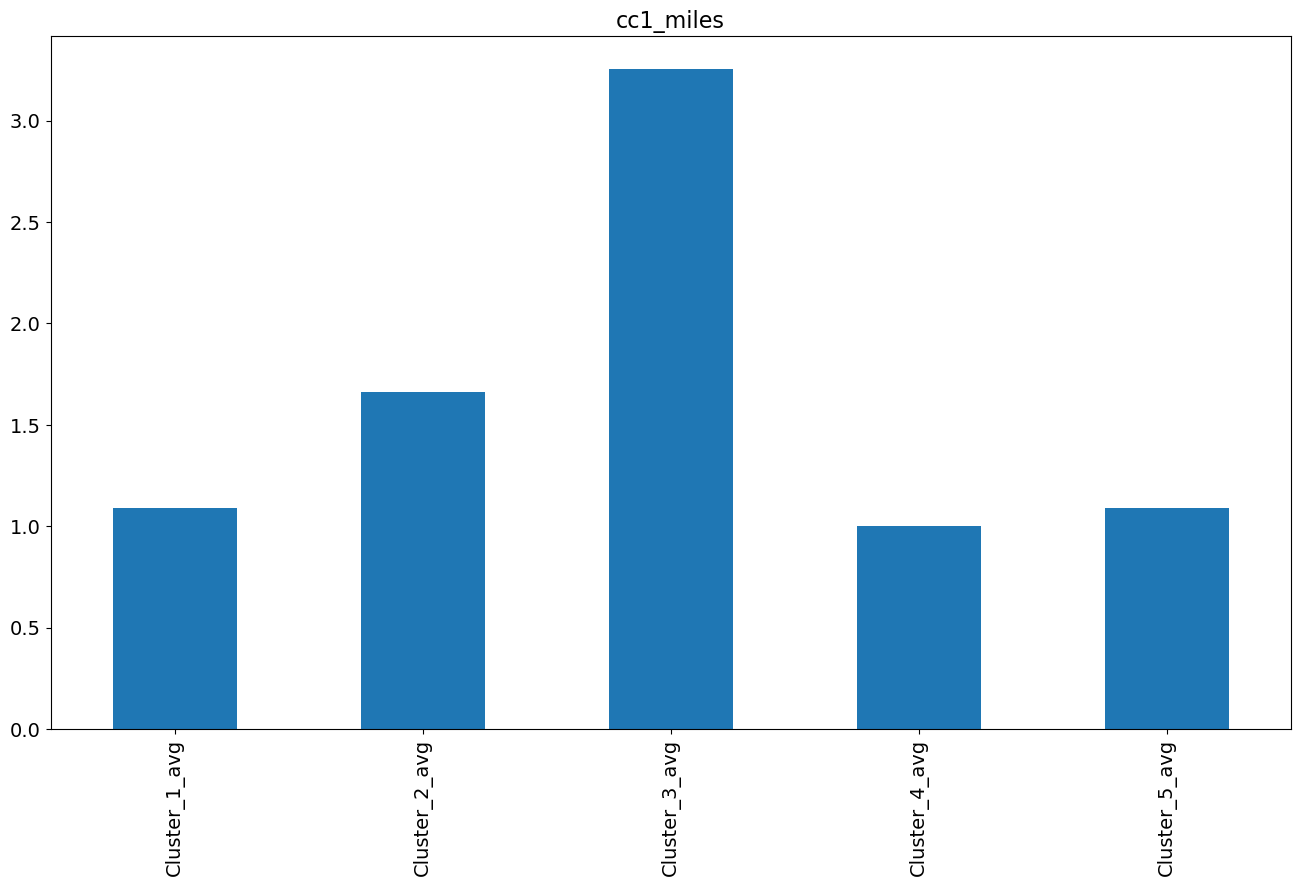

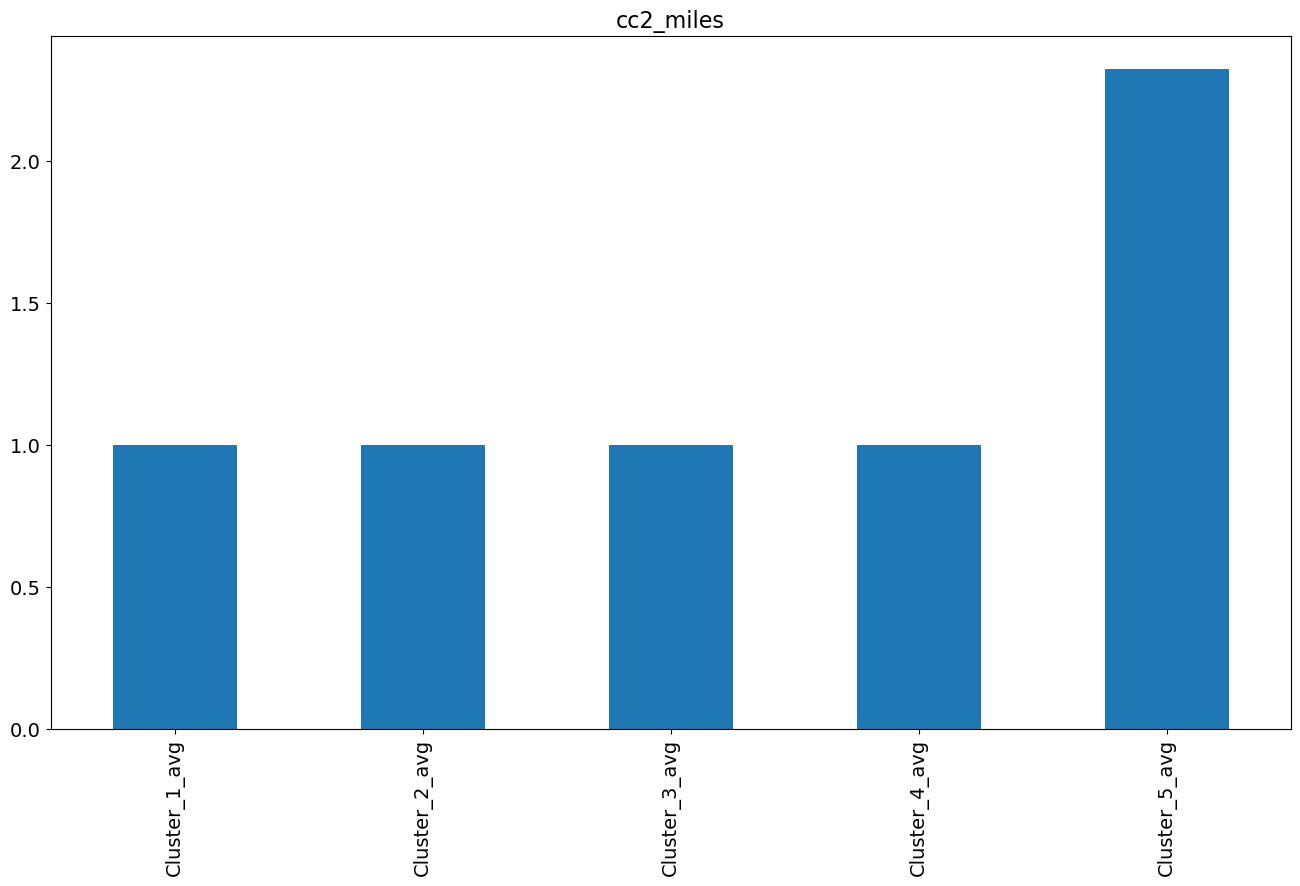

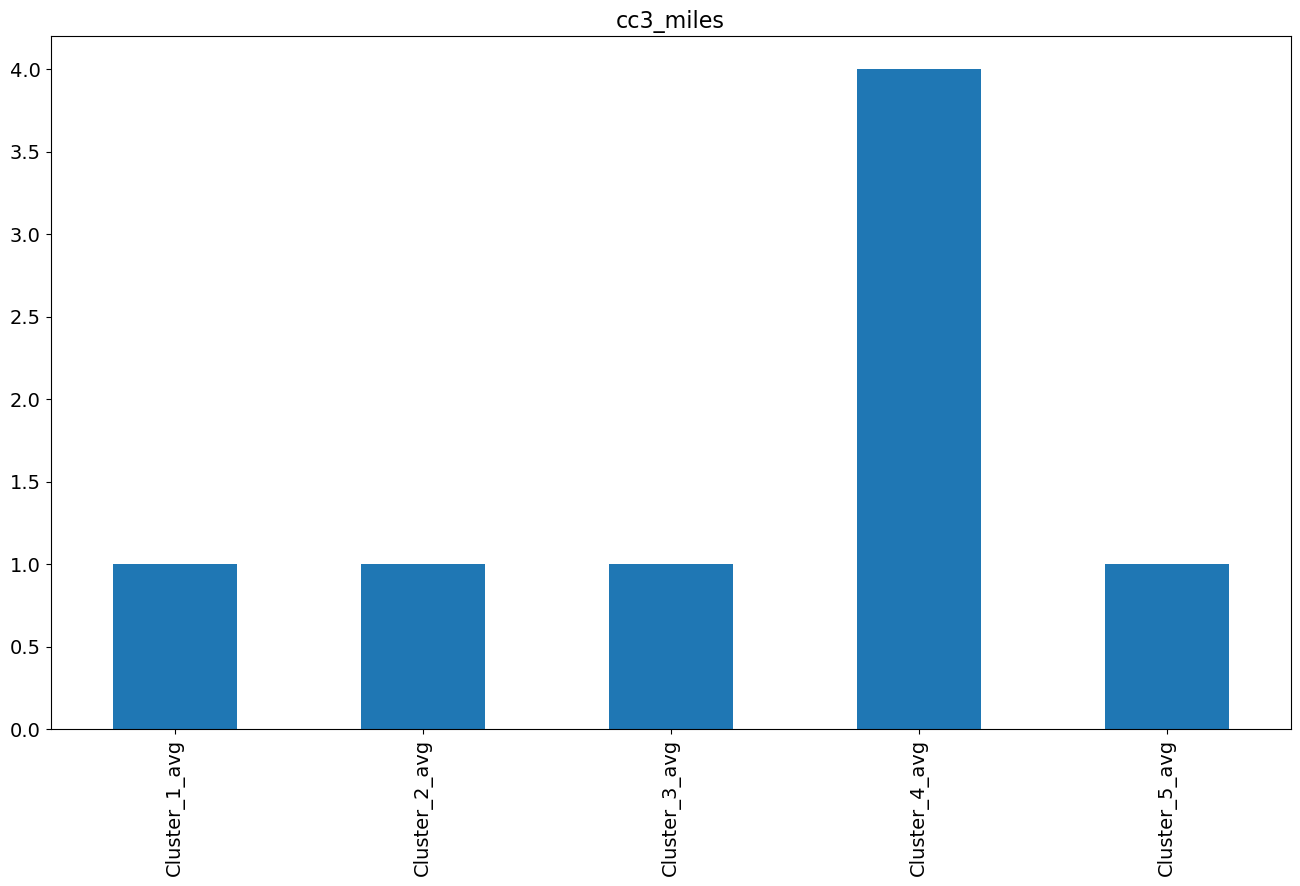

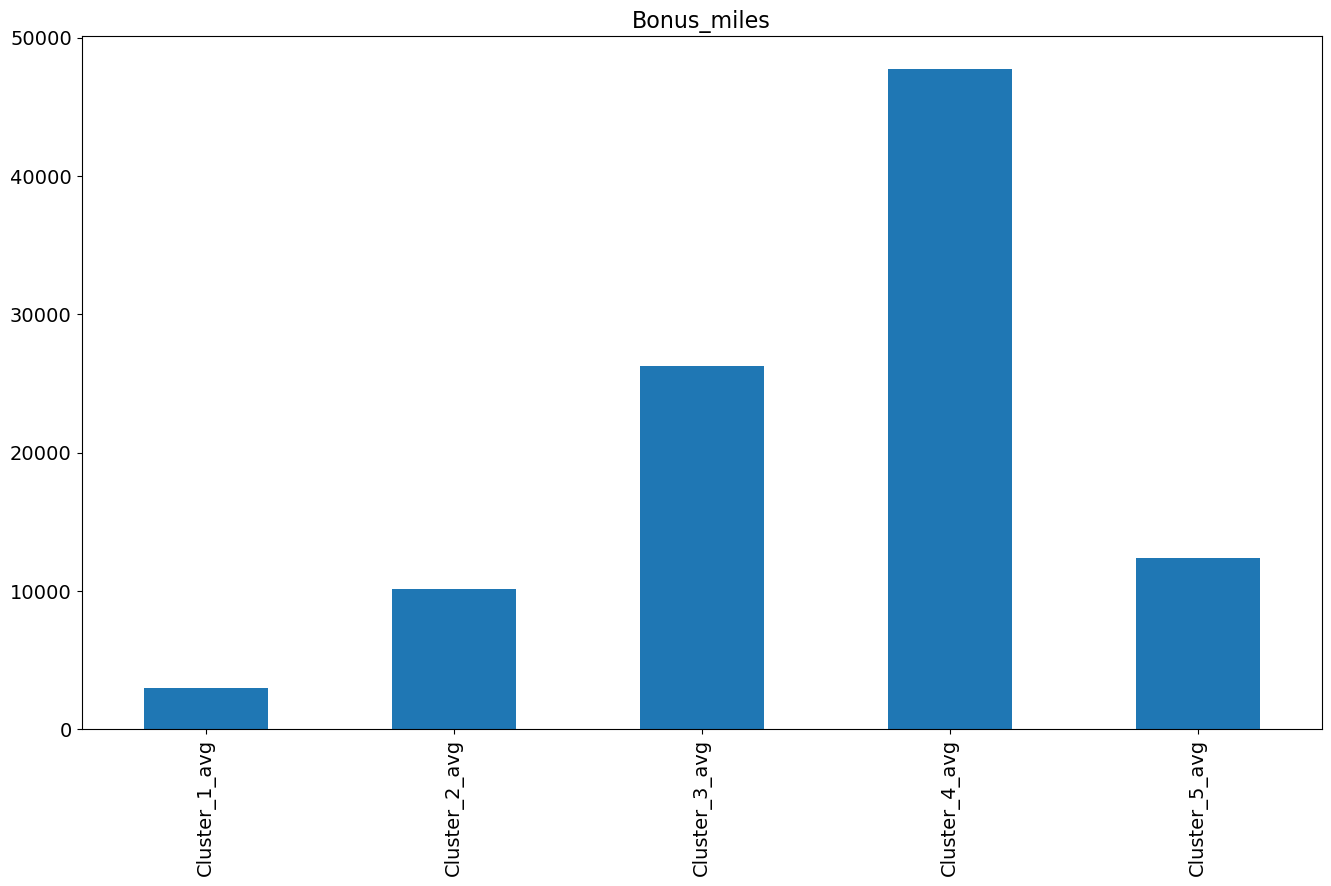

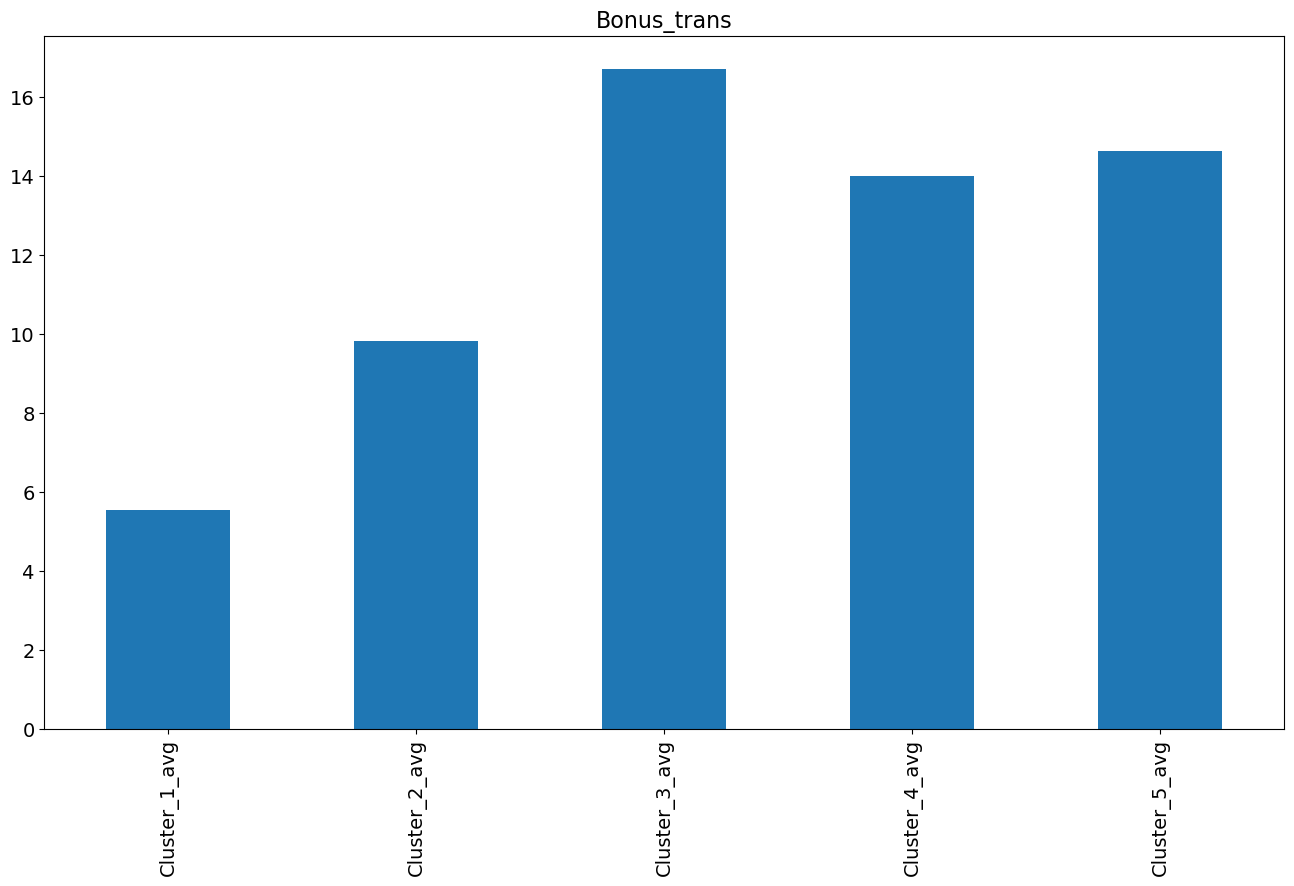

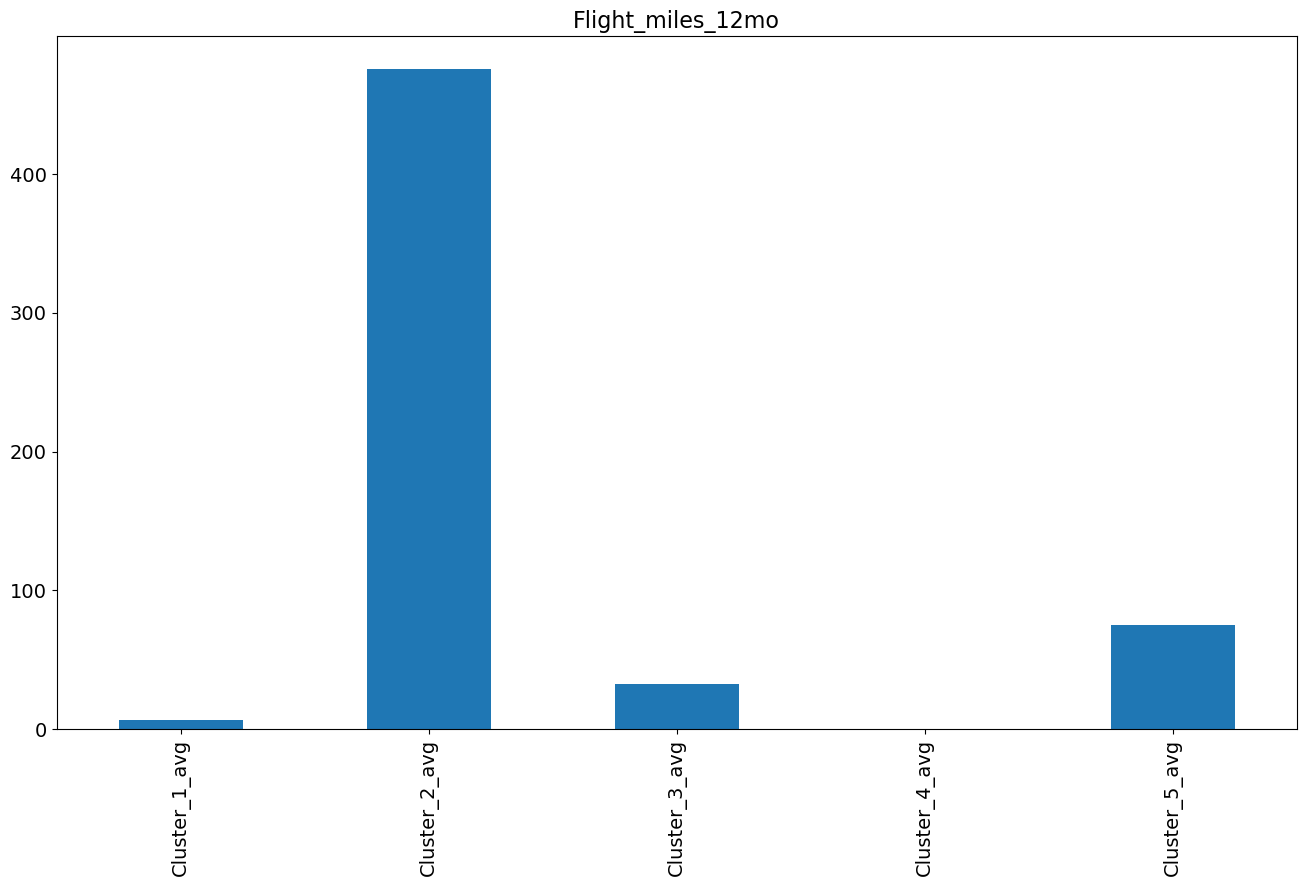

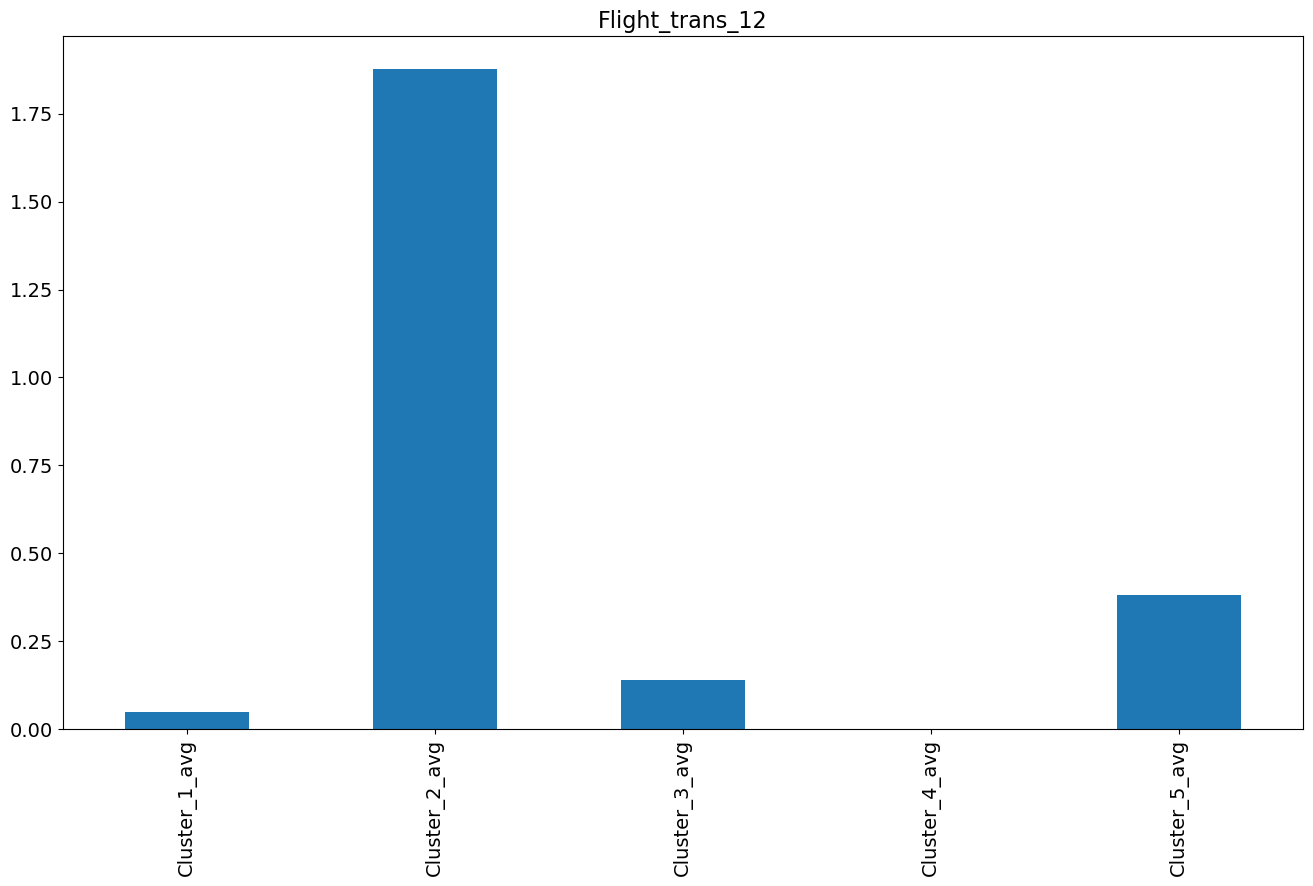

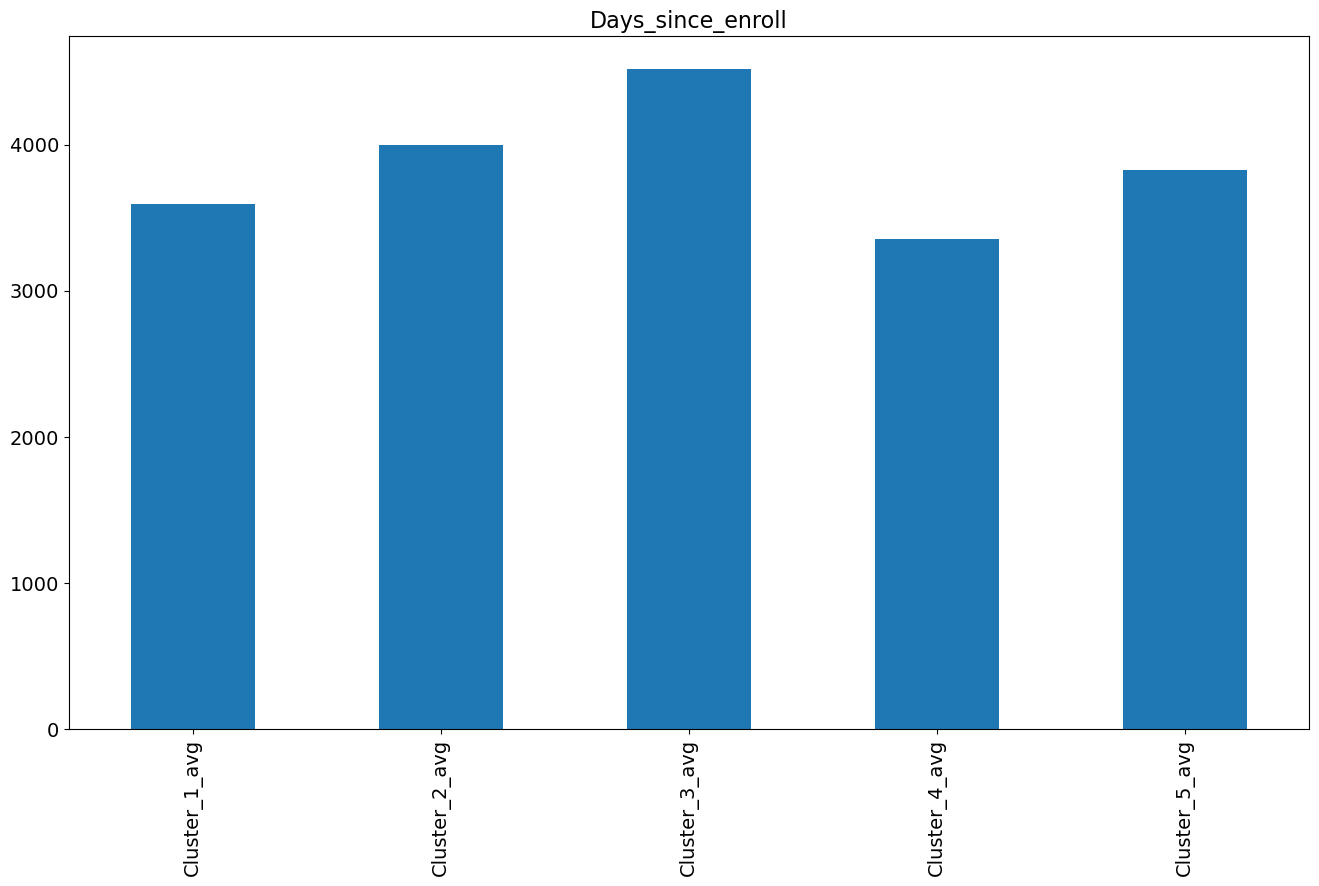

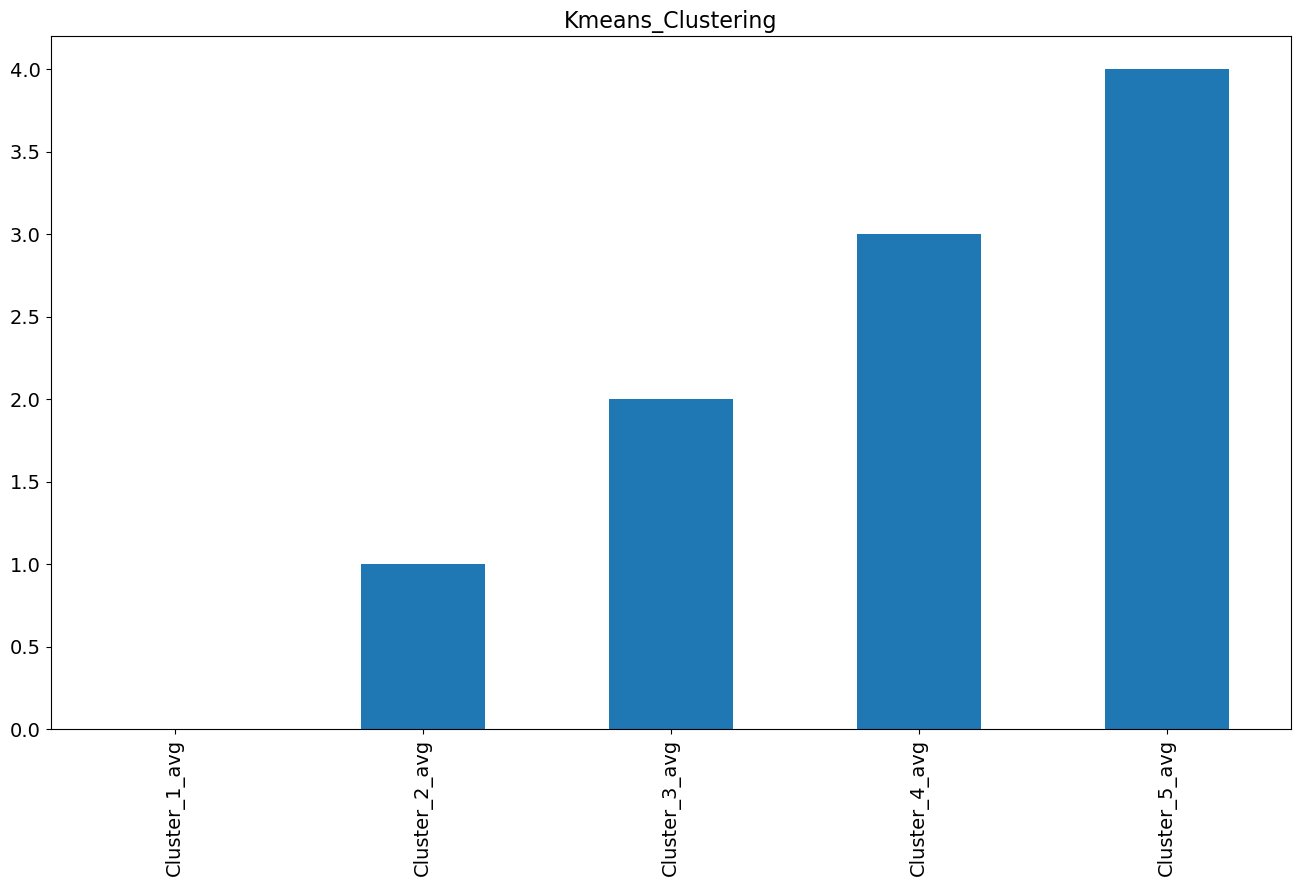

In [171]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(16,9))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()